# **Prediction Project: Credit Score Classification**

In this project, we are going to try developing some machine learning models to predict or make a credit score classification. The datasets used in this project are the Credit_Score_Classification train and test datasets that have been cleaned in a previous data cleaning and feature engineering project. The big picture of the plan in this project is as follow:
1. Call in the datasets and libraries, and also define some functions if needed
2. Get some understanding of the correlation between each feature (exploratory data analysis)
3. Determine which features to use as the input for the machine learning models
4. Split the input and output of the train dataset, then train the models
5. Score the machine learning models and tune the parameters
6. Classify the Credit_Score of the test dataset

The output expected from the machine learning models in this project is to determine a customer's credit score based on various data possessed by the customer as the inputs. Thus, the nature of the models that will be built can be categorized as classification models, that are supervised models to classify what credit score will emerge based on various features as the inputs. Some of the most practical and most used classification models, but not limited to them are Decision Tree, Random Forest, Support Vector Machine, Neural Network, Logistic Regression, K-Nearest Neighbors, and Naive-Bayes models. Each of these models behaves differently and thus each has different compatible type of data to work with. That is why we are also going to do some exploratory data analysis on the dataset to better understand the nature of the data present in each feature, then do some feature engineering to satisfy the input condition for each models if needed. After building the initial models, they are then going to be scored and optimized by doing some parameter tuning until good models are developed through this process. Lastly, the best model is going to be used to classify the last four months' Credit_Score for each customer in the test dataset.

## **I. Preparation**

In [2]:
# libraries for dataset manipulation
import pandas as pd
import numpy as np

# libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# label encoder for categorical features
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

# libraries for feature selection
from sklearn.feature_selection import SelectKBest
    # 1. ANOVA
from sklearn.feature_selection import f_classif
    # 2. Kendall's Tau
from scipy.stats import kendalltau
    # 3. Chi-Squared
from sklearn.feature_selection import chi2
    # 4. Mutual Information
from sklearn.feature_selection import mutual_info_classif

# to help selecting the best parameter configuration for the models
from sklearn.model_selection import GridSearchCV

# Random Forest module
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression module
from sklearn.linear_model import LogisticRegression

#KNearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

# Artificial Neural Network module
import tensorflow as tf
from tensorflow import keras

# data scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [3]:
# Calling in the datasets
train = pd.read_csv('Credit Score Classification (Cleaned Train Dataset).csv')
test = pd.read_csv('Credit Score Classification (Cleaned Test Dataset).csv')

## **II. Exploratory Data Analysis**

First of all, we are going to look deeper at the dataset to learn the nature and correlation of each feature that are present in the dataset. By doing so, we are supposed to get a better understanding of the dataset and thus will be able to more accurately determine what machine learning to use and which features to be selected as the input for each machine learning.

### **IIa. General overview**

There are some information regarding what each feature of the dataset represents given by the provider of the datasets. These information are very useful for us to better understand the datasets.

* 1. ID: Represents a unique identification of an entry
* 2. Customer_ID: Represents a unique identification of a person
* 3. Month: Represents the month of the year
* 4. Name: Represents the name of a person
* 5. Age: Represents the age of the person
* 6. SSN: Represents the social security number of a person
* 7. Occupation: Represents the occupation of the person
* 8. Annual_Income: Represents the annual income of the person
* 9. Monthly_Inhand_Salary:Represents the monthly base salary of a person
* 10. Num_Bank_Accounts: Represents the number of bank accounts a person holds
* 11. Num_Credit_Card: Represents the number of other credit cards held by a person
* 12. Interest_Rate: Represents the interest rate on credit card
* 13. Num_of_Loan: Represents the number of loans taken from the bank
* 14. Type_of_Loan: Represents the types of loan taken by a person
* 15. Delay_from_due_date: Represents the average number of days delayed from the payment date
* 16. Num_of_Delayed_Payment: Represents the average number of payments delayed by a person
* 17. Changed_Credit_Limit: Represents the percentage change in credit card limit
* 18. Num_Credit_Inquiries: Represents the number of credit card inquiries
* 19. Credit_Mix: Represents the classification of the mix of credits
* 20. Outstanding_Debt: Represents the remaining debt to be paid (in USD)
* 21. Credit_Utilization_Ratio: Represents the utilization ratio of credit card
* 22. Credit_History_Age: Represents the age of credit history of the person
* 23. Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person
* 24. Total_EMI_per_month: Represents the monthly EMI payments (in USD)
* 25. Amount_invested_monthly: Represents the monthly amount invested by the customer (in USD)
* 26. Payment_Behaviour: Represents the payment behavior of the customer (in USD)
* 27. Monthly_Balance: Represents the monthly balance amount of the customer (in USD)

In [4]:
# dataset shape
print(' train dataset entries x features :', train.shape, '\n',
     'test dataset entries x features  :', test.shape)

 train dataset entries x features : (100000, 36) 
 test dataset entries x features  : (50000, 35)


In [5]:
# first 5 rows in train dataset
pd.set_option('display.max_columns', None)
train.head()

,Unnamed: 0,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Num_of_Loan,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,Credit_Score
0,0,0x1602,CUS_0xd40,January,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,3,7.0,11.27,4.0,Bad,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,4,True,True,False,True,False,False,False,True,False,Good
1,1,0x1603,CUS_0xd40,February,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,-1,7.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,4,True,True,False,True,False,False,False,True,False,Good
2,2,0x1604,CUS_0xd40,March,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,3,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,4,True,True,False,True,False,False,False,True,False,Good
3,3,0x1605,CUS_0xd40,April,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,5,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,4,True,True,False,True,False,False,False,True,False,Good
4,4,0x1606,CUS_0xd40,May,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,6,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,4,True,True,False,True,False,False,False,True,False,Good


In [6]:
# first 5 rows in test dataset
test.head()

,Unnamed: 0,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Num_of_Loan,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,0,0x160a,CUS_0xd40,September,24.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,3,7.0,11.27,4.0,Good,809.98,35.030402,273.0,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702,4,True,True,False,True,False,False,False,True,False
1,1,0x160b,CUS_0xd40,October,24.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,3,9.0,13.27,4.0,Good,809.98,33.053114,274.0,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004,4,True,True,False,True,False,False,False,True,False
2,2,0x160c,CUS_0xd40,November,24.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,-1,4.0,12.27,4.0,Good,809.98,33.811894,275.0,No,49.574949,148.233938,Low_spent_Medium_value_payments,264.675446,4,True,True,False,True,False,False,False,True,False
3,3,0x160d,CUS_0xd40,December,24.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,5.0,11.27,4.0,Good,809.98,32.430559,276.0,No,49.574949,39.082511,High_spent_Medium_value_payments,343.826873,4,True,True,False,True,False,False,False,True,False
4,4,0x1616,CUS_0x21b1,September,28.0,004-07-5839,Teacher,34847.84,3037.986667,2.0,4.0,6.0,3,1.0,5.42,5.0,Good,605.03,25.926822,327.0,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434,1,False,True,False,False,False,False,False,False,False


In [7]:
# train data type info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                100000 non-null  int64  
 1   ID                        100000 non-null  object 
 2   Customer_ID               100000 non-null  object 
 3   Month                     100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Delay_from_due_date       100000 non-null  int64  
 13  Num_of_Delayed_Payment    100000 non-null  fl

In [8]:
# test data type info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                50000 non-null  int64  
 1   ID                        50000 non-null  object 
 2   Customer_ID               50000 non-null  object 
 3   Month                     50000 non-null  object 
 4   Age                       50000 non-null  float64
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  float64
 8   Monthly_Inhand_Salary     50000 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  float64
 10  Num_Credit_Card           50000 non-null  float64
 11  Interest_Rate             50000 non-null  float64
 12  Delay_from_due_date       50000 non-null  int64  
 13  Num_of_Delayed_Payment    50000 non-null  float64
 14  Change

There exists Unnamed: 0 feature, a feature that is not present previously. This was automatically generated when we called the dataset to serve as a unique identifier for each row. However, since we already have ID feature as the unique identifier, we will be dropping the Unnamed: 0 feature instead. 

In [9]:
# Dropping the Unnamed feature
train.drop('Unnamed: 0', axis = 1, inplace = True)
test.drop('Unnamed: 0', axis = 1, inplace = True)

We are now going to store the features present in both datasets into different lists based on the type of data each feature contain for further use in analysis.

In [10]:
# Storing features based on each feature's data type

# train numerical features
trainNum = []
for col in train.columns:
    if train[col].dtype == ('float64') or train[col].dtype == ('int64'):
        trainNum.append(col)

# test numerical features
testNum = []
for col in test.columns:
    if test[col].dtype == ('float64') or test[col].dtype == ('int64'):
        testNum.append(col)
        
# train categorical features
trainCat = []
for col in train.columns:
    if train[col].dtype == ('object'):
        trainCat.append(col)

# test categorical features
testCat = []
for col in test.columns:
    if test[col].dtype == ('object'):
        testCat.append(col)
        
# train boolean features
trainBool = []
for col in test.columns:
    if train[col].dtype == ('bool'):
        trainBool.append(col)

# test boolean features
testBool = []
for col in test.columns:
    if test[col].dtype == ('bool'):
        testBool.append(col)

For the categorical features, there are some features that do not mean much for analysis, such as ID, Customer_ID, and SSN, as they mainly serve only as identifiers for the customers. We are going to further categorize only the categorical features that will be used for the machine learning building.

In [11]:
# categorical features to drop
CatDrop = ['ID', 'Customer_ID', 'SSN']

# dropping the categorical features from trainCat
for feature in CatDrop:
    trainCat.remove(feature)
    testCat.remove(feature)

### **IIb. Univariate Analysis**

#### **Numerical Features**

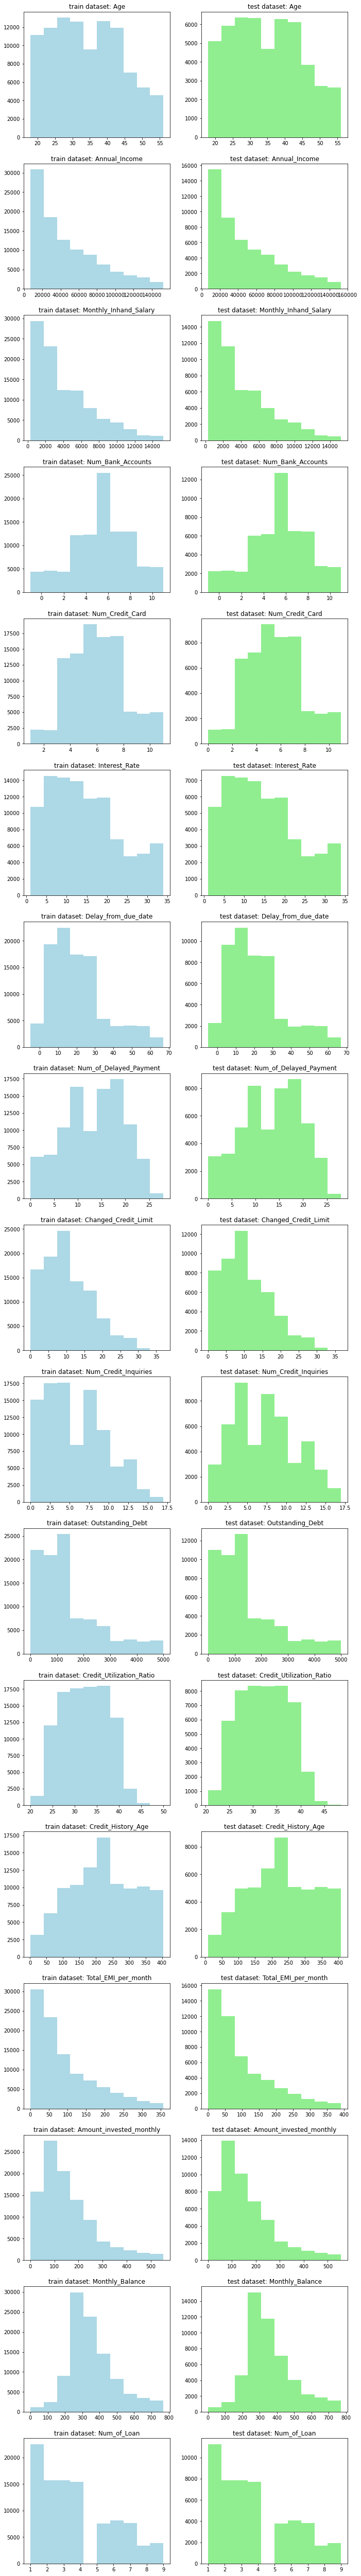

In [12]:
# creating figure
fig, ax = plt.subplots(17, 2, figsize = (10, 70))
fig.tight_layout(pad = 3)

# creating histogram subplots
row = 0
for trainfeature, testfeature in zip(trainNum, testNum):
    # create subplots
    ax[row, 0].hist(train[trainfeature], color = 'lightblue')
    ax[row, 0].set_title('train dataset: ' + trainfeature)
    ax[row, 1].hist(test[testfeature], color = 'lightgreen')
    ax[row, 1].set_title('test dataset: ' + testfeature)
    
    # moving subplot positions
    row = row + 1

In each numerical features, both train and test datasets show a very similar data distrbution. After looking at the above histograms, we can gather the data distribution of each numerical feature.

In [13]:
# histogram skewness

# creating list
listTrainSkewNum = []
listTrainSkewness = []
listTestSkewNum = []
listTestSkewness = []

# data distribution shape
DataDistModality = ['bimodal', 'unimodal', 'unimodal',
                    'unimodal', 'unimodal', 'unimodal',
                    'unimodal', 'bimodal', 'unimodal',
                    'multimodal', 'unimodal', 'unimodal',
                    'unimodal', 'unimodal', 'unimodal',
                    'unimodal', 'bimodal']

# skewness
for trainfeature, testfeature in zip(trainNum, testNum):
    # for train numerical features
    trainSkew = train[trainfeature].skew()
    listTrainSkewNum.append(trainSkew)
    if trainSkew >= 1:
        trainSkewness = 'highly right-skewed'
    elif trainSkew <= -1:
        trainSkewness = 'highly left-skewed'
    elif trainSkew < 1 and trainSkew >= 0.5:
        trainSkewness = 'moderately right-skewed'
    elif trainSkew > -1 and trainSkew <= -0.5:
        trainSkewness = 'moderately left-skewed'
    else:
        trainSkewness = 'symmetrical'
    listTrainSkewness.append(trainSkewness)
    
    # for test numerical features
    testSkew = test[testfeature].skew()
    listTestSkewNum.append(testSkew)
    if testSkew >= 1:
        testSkewness = 'highly right-skewed'
    elif testSkew <= -1:
        testSkewness = 'highly left-skewed'
    elif testSkew < 1 and testSkew >= 0.5:
        testSkewness = 'moderately right-skewed'
    elif testSkew > -1 and testSkew <= -0.5:
        testSkewness = 'moderately left-skewed'
    else:
        testSkewness = 'symmetrical'
    listTestSkewness.append(testSkewness)
    
# numerical features data distribution report
SkewnessTable = pd.DataFrame(list(zip(trainNum, DataDistModality, listTrainSkewNum, listTrainSkewness,
                                      listTestSkewNum, listTestSkewness)))
SkewnessTable.columns = ('Feature', 'Data Distribution Modality', 'Train Skew Number', 'Train Skewness',
                         'Test Skew Number', 'Test Skewness')
SkewnessTable

,Feature,Data Distribution Modality,Train Skew Number,Train Skewness,Test Skew Number,Test Skewness
0,Age,bimodal,0.226032,symmetrical,0.215141,symmetrical
1,Annual_Income,unimodal,0.984898,moderately right-skewed,0.984954,moderately right-skewed
2,Monthly_Inhand_Salary,unimodal,1.129059,highly right-skewed,1.130264,highly right-skewed
3,Num_Bank_Accounts,unimodal,-0.190614,symmetrical,-0.191808,symmetrical
4,Num_Credit_Card,unimodal,0.227589,symmetrical,0.226789,symmetrical
5,Interest_Rate,unimodal,0.496232,symmetrical,0.496239,symmetrical
6,Delay_from_due_date,unimodal,0.966395,moderately right-skewed,0.964928,moderately right-skewed
7,Num_of_Delayed_Payment,bimodal,-0.177123,symmetrical,-0.183110,symmetrical
8,Changed_Credit_Limit,unimodal,0.728499,moderately right-skewed,0.724874,moderately right-skewed
9,Num_Credit_Inquiries,multimodal,0.407560,symmetrical,0.289827,symmetrical


### IIc. Bivariate Analysis

Bivariate analysis is an analysis between two variables or features in a dataset. We are essentially going to do the the analysis on the Credit_Score feature, which is the output of this project. All the other features are going to be visualized against the output feature. Box plots will be used as the visualization tool for numerical data, while Count Plot for categorical data.

#### **i. Numerical features vs. Credit_Score**

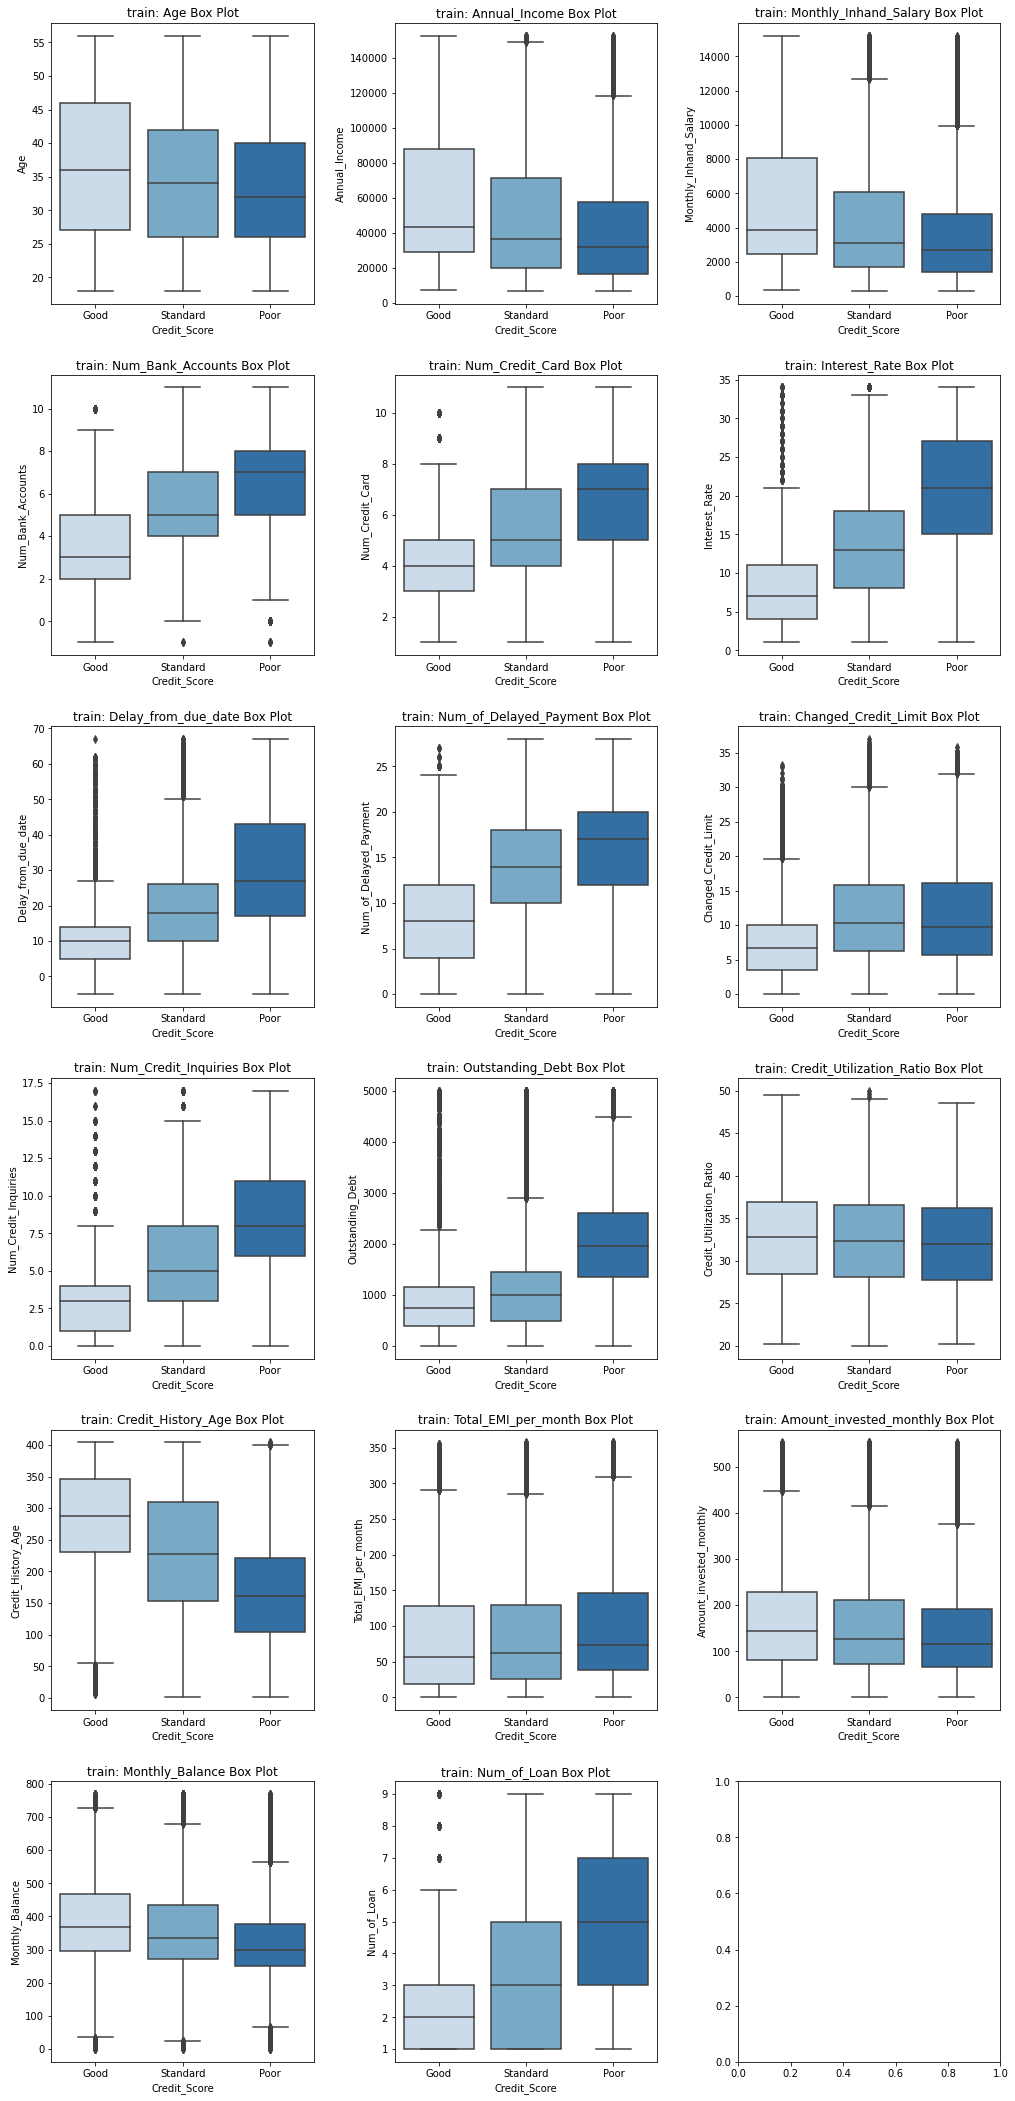

In [14]:
# creating figure
fig, axes = plt.subplots(6, 3, figsize = (15, 30))
fig.tight_layout(pad = 5)

# start of moving parameter for the subplot positions
setstart = 0
setstop = 3
row = 0
cols = [0, 1, 2]

# plotting the box plots
while row < 6: 
    for feature, col in zip(trainNum[setstart:setstop], cols):
        sns.boxplot(x = train['Credit_Score'], 
                    y = train[feature], 
                    ax = axes[row, col], 
                    palette = 'Blues').set(title = 'train: ' + feature + ' Box Plot')
    setstart = setstart + 3
    setstop = setstop + 3
    row = row + 1
plt.show()

#### **ii.Boolean features vs. Credit_Score**

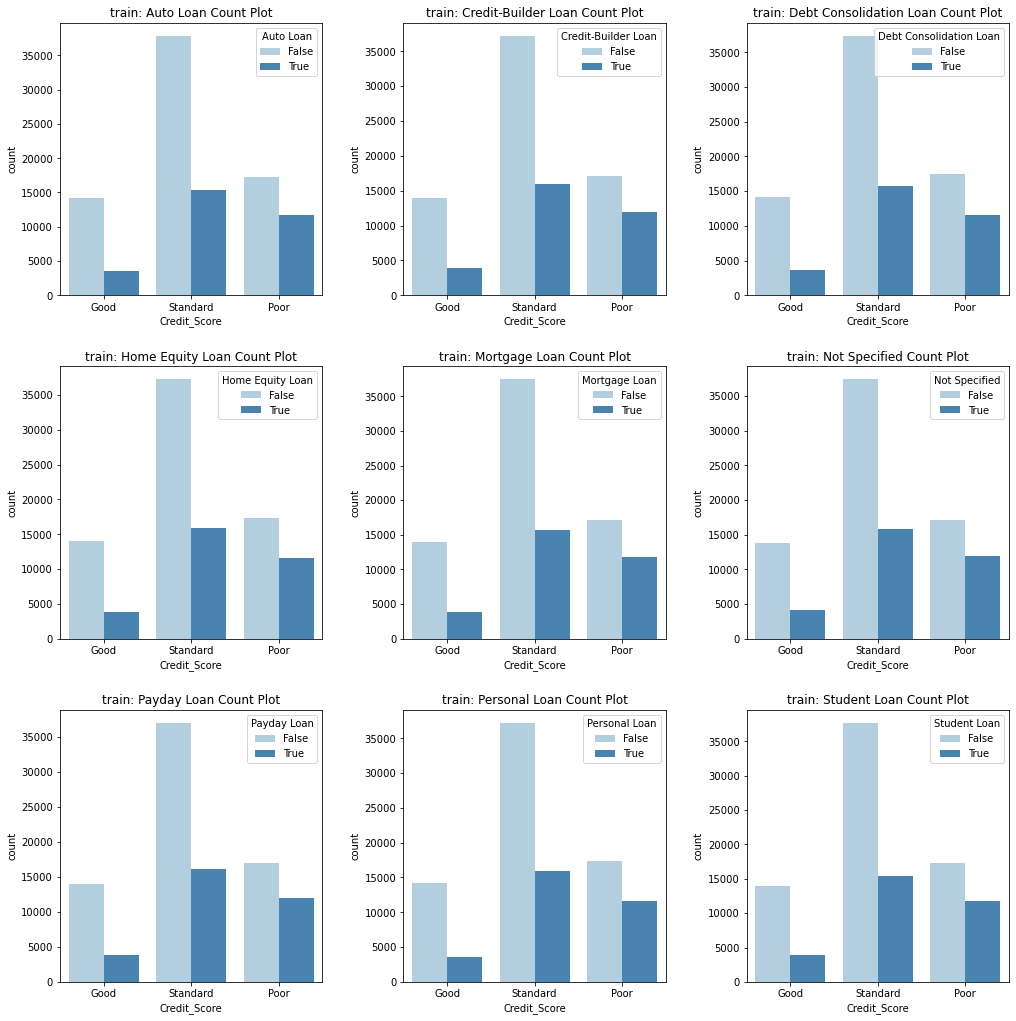

In [15]:
# creating figure
fig, axes = plt.subplots(3, 3, figsize = (15, 15))
fig.tight_layout(pad = 5)

# start of moving parameter for the subplot positions
setstart = 0
setstop = 3
row = 0
cols = [0, 1, 2]

# plotting the count plots
while row < 3: 
    for feature, col in zip(trainBool[setstart:setstop], cols):
        sns.countplot(x = train['Credit_Score'], 
                      hue = train[feature], 
                      ax = axes[row, col], 
                      palette = 'Blues').set(title = 'train: ' + feature + ' Count Plot')
    setstart = setstart + 3
    setstop = setstop + 3
    row = row + 1
plt.show()

#### **iii.Ordinal and nominal features vs. Credit_Score**

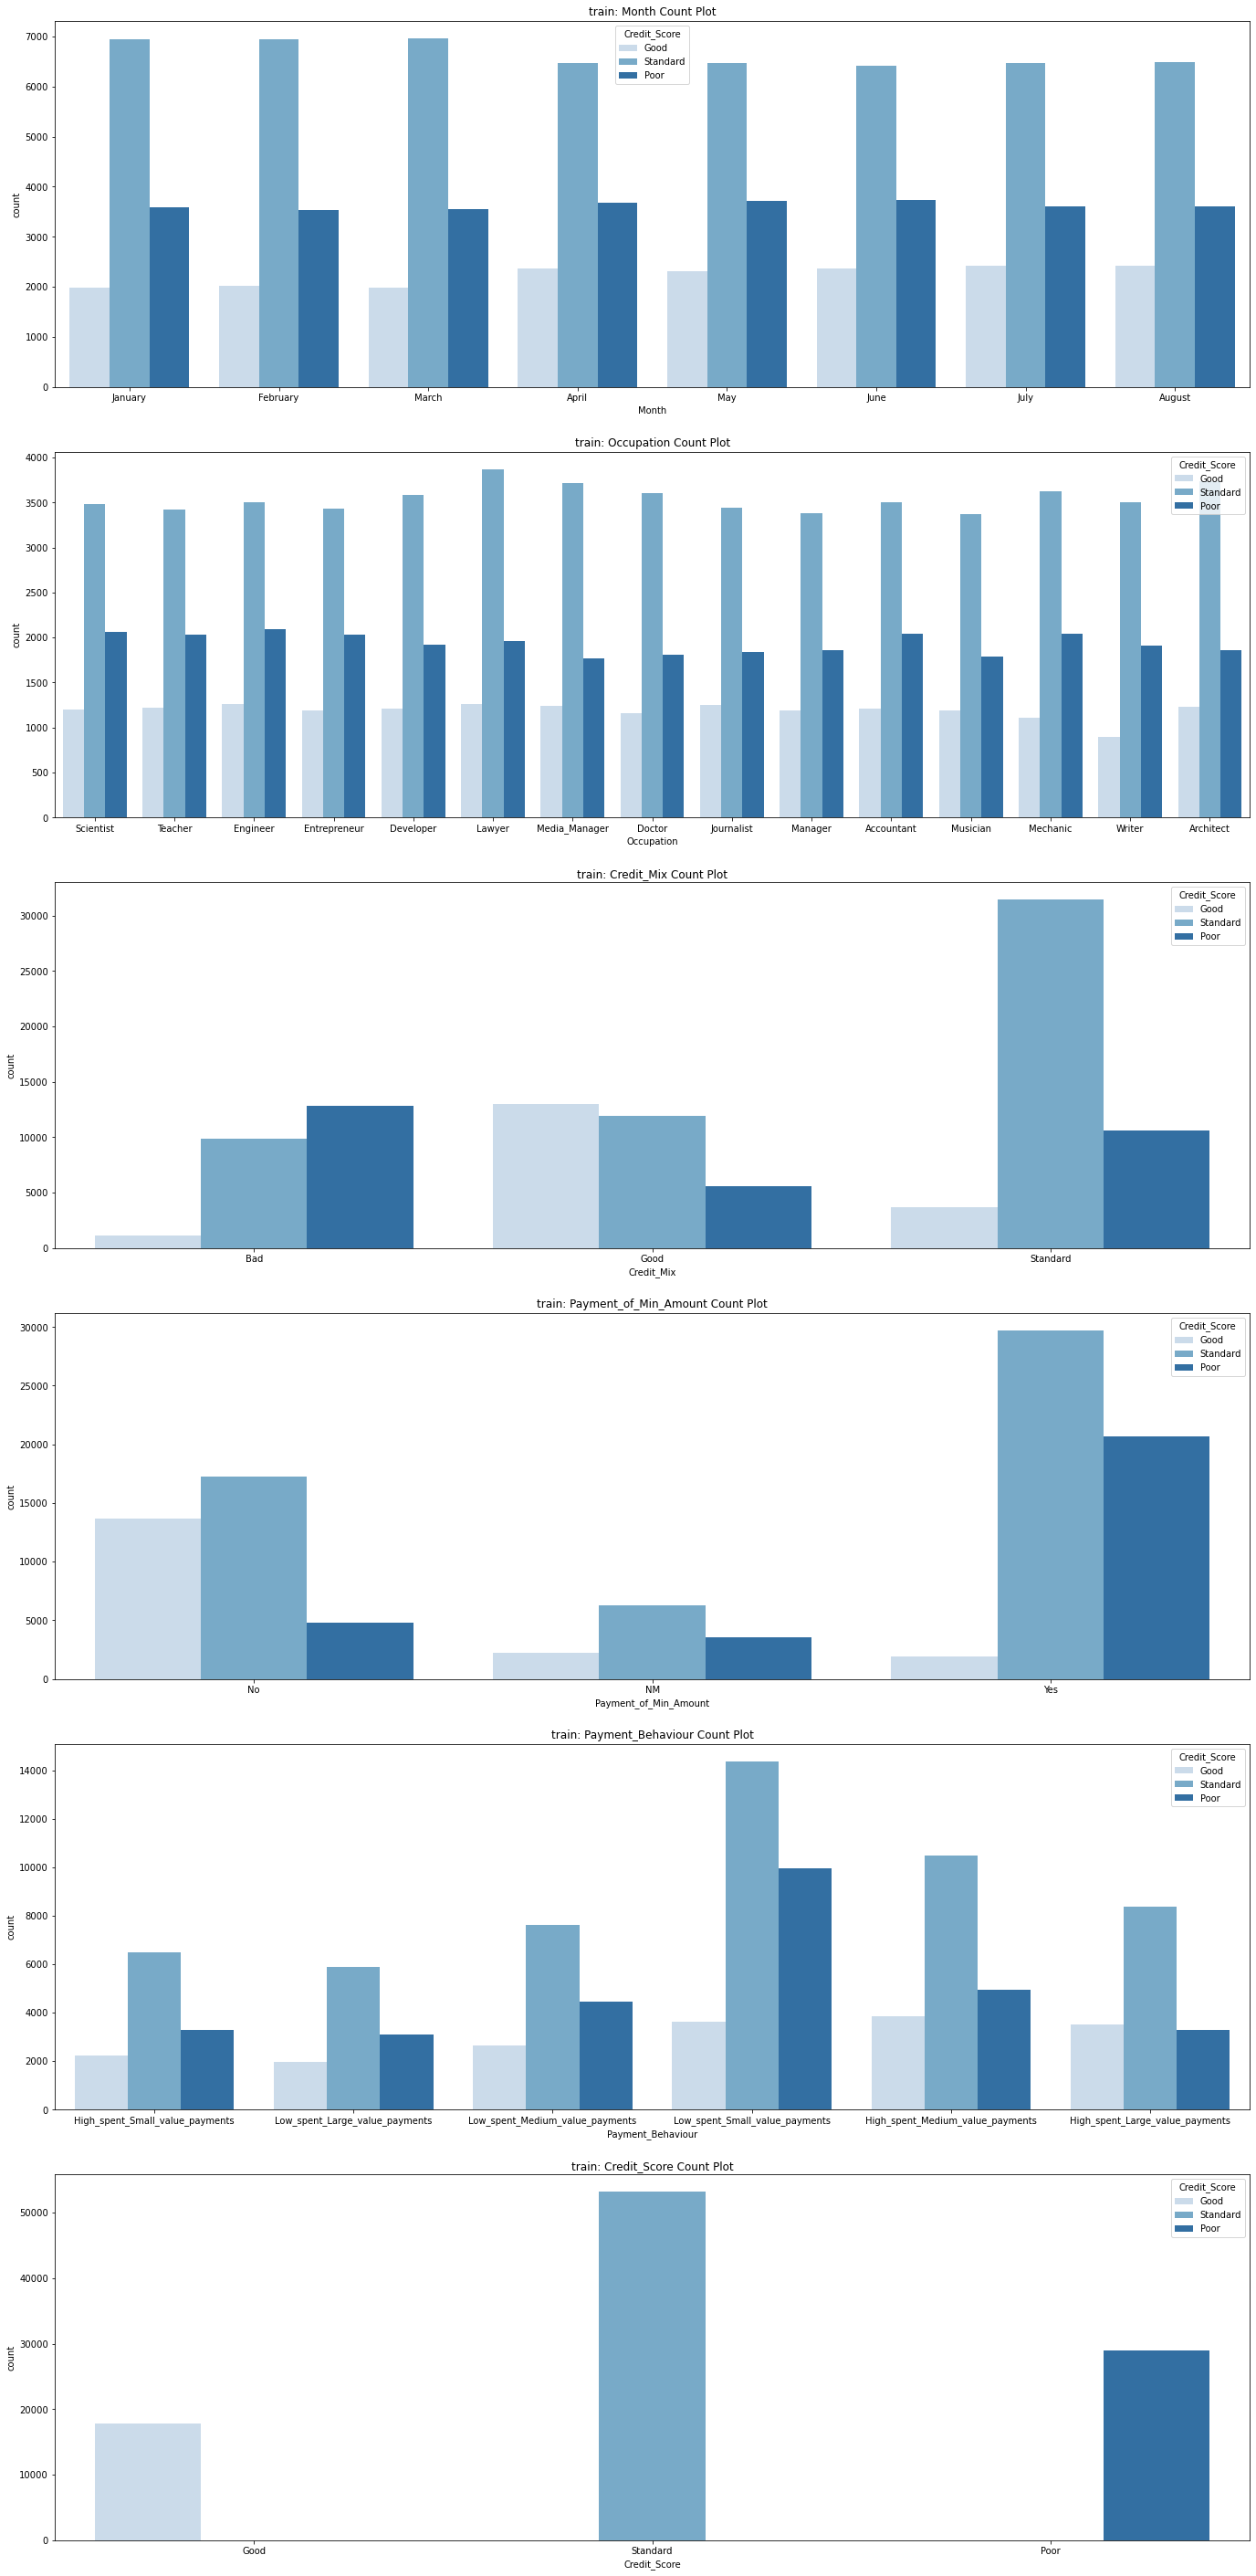

In [16]:
# creating figure
fig, axes = plt.subplots(6, 1 , figsize = (20, 40))
fig.tight_layout(pad = 5)

# plotting the count plots
row = 0
for feature in trainCat:
    sns.countplot(x = train[feature],
                 hue = train['Credit_Score'],
                 ax = axes[row],
                 palette = 'Blues').set(title = 'train: ' + feature + ' Count Plot')
    row = row + 1

## **III. Feature Selection**

Before building all the machine learning models, we first need to select some subsets of features to use as the inputs for each model. The purpose of this selection is to reduce the time needed for the models to compute and also in most cases to increase the accuracy of the models themselves. This is due to the different nature of each model, for example some are better suited to compute numerical data as the input, while others are better at handling categorical data. We will elaborate the input selection for the model building further.

In [17]:
# feature selection method

# defining the input, output, and methods used for the feature selection process
listinput = ['numerical (normal)', 'numerical (skewed)', 'categorical', 'boolean']
listoutput = [['categorical'], ['categorical'], ['categorical'], ['categorical']]
listmethod = [['ANOVA', 'Pearson'], 
              ["Kendall's Tau", 'Pearson'], 
              ['Chi-Squared', 'Mutual Information'],
              ['Mutual Information']]

# creating feature selection method table
MultVarAnalysisMethod = pd.DataFrame({'Input': listinput, 'Output': listoutput, 'Method': listmethod})
display(MultVarAnalysisMethod)

,Input,Output,Method
0,numerical (normal),[categorical],"[ANOVA, Pearson]"
1,numerical (skewed),[categorical],"[Kendall's Tau, Pearson]"
2,categorical,[categorical],"[Chi-Squared, Mutual Information]"
3,boolean,[categorical],[Mutual Information]


### **IIIa. Dataset engineering**

Before conducting the feature selection process, let's do some engineering to the dataset to make it easier to process.

In [18]:
# setting original train dataset copy for a checkpoint
trainOriginal = train.copy()

In [19]:
# dropping the ID, Customer_ID, and SSN features from train for reasons previously stated
for feature in CatDrop:
    train.drop(feature, axis = 1, inplace = True)

In [20]:
# appending Credit_Score feature into trainNum to include the output feature
trainNum.append('Credit_Score')

In [21]:
# Input features of train
trainInput = train[train.columns[:-1]]

# Output feature of train
trainOutput = train[train.columns[-1]]

In [23]:
trainCat[:-1]

['Month',
 'Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour']

In [25]:
# encoding the categorical value in train dataset
for feature in trainCat[:-1]: # Credit_Score needs to be separated as it will be inversed to its original in the end
    train[feature] = enc.fit_transform(train[feature])

# encoding and storing the Credit_Score feature
encCredit_Score = enc.fit_transform(train['Credit_Score'])
train['Credit_Score'] = encCredit_Score

In [232]:
backup = pd.read_csv('Credit Score Classification (Cleaned Train Dataset).csv')

In [233]:
train['Credit_Score'] = backup['Credit_Score']

In [234]:
# encoding, and transforming the Credit_Score feature
enc.fit(train['Credit_Score'])
classes = list(enc.classes_)
codes = list(enc.transform(list(enc.classes_)))
encCredit_Score = pd.DataFrame(list(zip(classes, codes)))
encCredit_Score.columns = ('Classes', 'Codes')
DictCredit_Score = dict(list(enumerate(encCredit_Score['Classes'])))
train['Credit_Score'] = enc.transform(train['Credit_Score'])

For the numerical input with **normal data distribution**, ANOVA method will be used. For the numerical input with **skewed, bimodal, and/or multimodal data distribution**, Kendall's Tau method will be used.

In [26]:
# storing the numerical features with normal data distribution
trainNumNormal = SkewnessTable['Feature'][SkewnessTable['Data Distribution Modality'] == 'unimodal'][SkewnessTable['Train Skewness'] == 'symmetrical']
trainNumNormal

3            Num_Bank_Accounts
4              Num_Credit_Card
5                Interest_Rate
11    Credit_Utilization_Ratio
12          Credit_History_Age
Name: Feature, dtype: object

In [27]:
# storing the numerical features with non-normal data distribution
normalindex = trainNumNormal.index
trainNumNotNormal = SkewnessTable['Feature'].drop(normalindex, axis = 0)
trainNumNotNormal

0                         Age
1               Annual_Income
2       Monthly_Inhand_Salary
6         Delay_from_due_date
7      Num_of_Delayed_Payment
8        Changed_Credit_Limit
9        Num_Credit_Inquiries
10           Outstanding_Debt
13        Total_EMI_per_month
14    Amount_invested_monthly
15            Monthly_Balance
16                Num_of_Loan
Name: Feature, dtype: object

In [28]:
# mapping the boolean categorical feature into a numerical form
for feature in trainBool:
    train[feature] = enc.fit_transform(train[feature])

### **IIIb. Pearson Correlation**

In this method, we will gather the features which have a rather high correlation coefficient with the Credit_Score feature. As a rule of thumb, the condition for a feature to be assumed having a strong correlation is if its correlation coefficient is higher than 0.7 

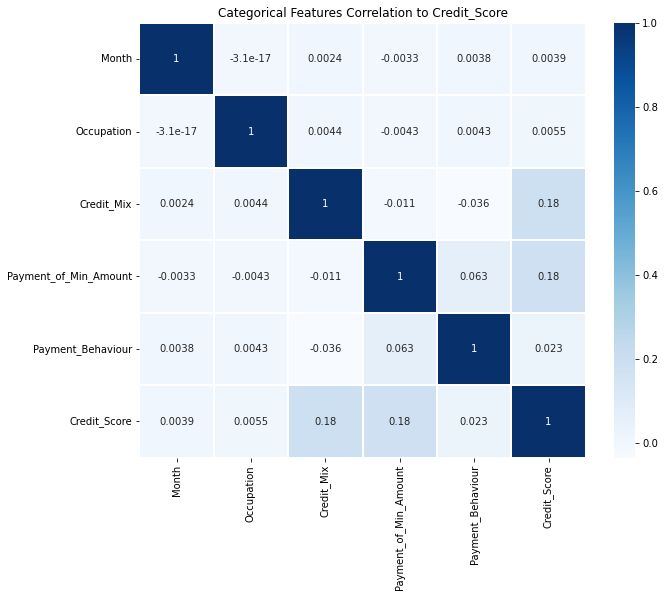

In [29]:
# categorical feature correlation to Credit_Score using Pearson correlation

# setting up the figure
plt.figure(figsize = (10, 8))

# creating the correlation heatmap
sns.heatmap(train[trainCat].corr(),
           annot = True,
           linewidths = 0.1,
           cmap = 'Blues')
plt.title('Categorical Features Correlation to Credit_Score')
plt.show()

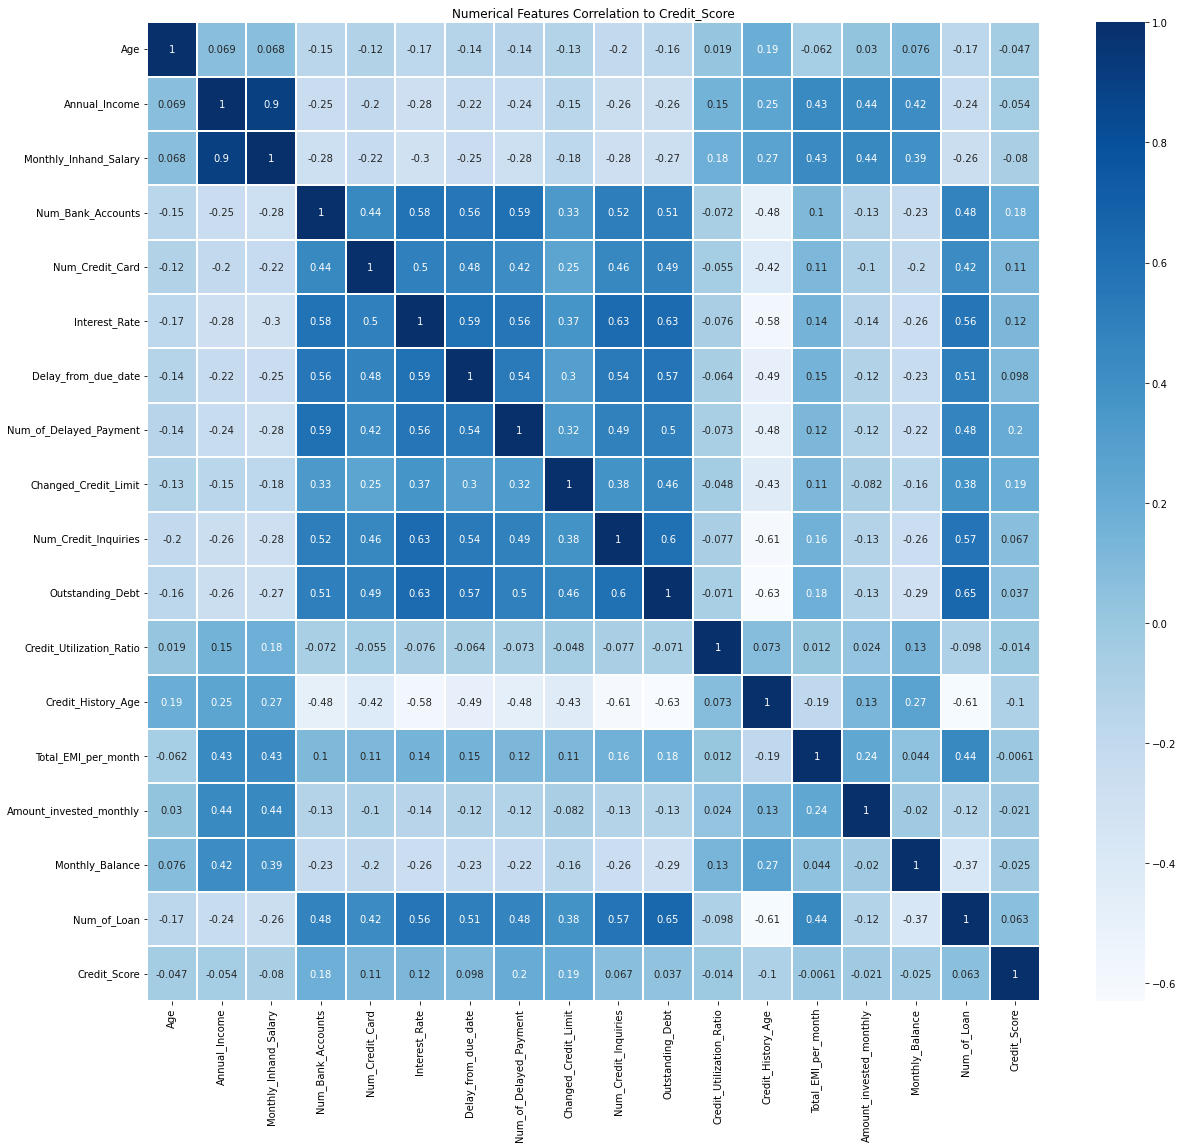

In [30]:
# numerical features correlation to Credit_Score using Pearson correlation

# setting up the figure
plt.figure(figsize = (20, 18))

# creating the correlation heatmap
sns.heatmap(train[trainNum].corr(),
           annot = True,
           linewidths = 0.1,
           cmap = 'Blues')
plt.title('Numerical Features Correlation to Credit_Score')
plt.show()

From both correlation heatmaps above, it is gathered that none of the input features have strong correlation with the output feature Credit_Score. This might be due to Credit_Score initially being a categorical feature. We will proceed with the other feature selection methods.

### **IIIc. ANOVA F-Score**

,Feature,f-score,p-value
3,Num_Bank_Accounts,9264.385781,0.000000e+00
4,Num_Credit_Card,9771.818133,0.000000e+00
5,Interest_Rate,15420.276171,0.000000e+00
11,Credit_Utilization_Ratio,105.296722,2.081137e-46
12,Credit_History_Age,8903.725479,0.000000e+00


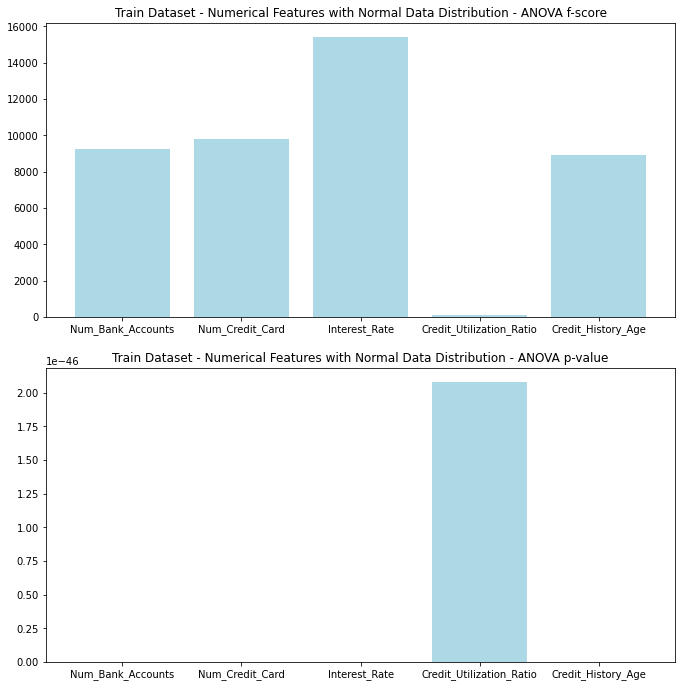

In [31]:
# setting the model to calculate correlation value using ANOVA
fs = SelectKBest(score_func = f_classif, 
                 k = 'all')

# fitting the input and output into the model
fsinput = train[trainNumNormal] # numerical features with normal distribution
fsresponse = train['Credit_Score']
fs.fit(fsinput, fsresponse)

# creating ANOVA report table
ANOVAreport = pd.DataFrame({'Feature': trainNumNormal, 'f-score': fs.scores_, 'p-value': fs.pvalues_})
display(ANOVAreport)

# displaying the ANOVA f-scores and their corresponding p-values in bar plots
fig, axes = plt.subplots(2, figsize = (10, 10))
fig.tight_layout(pad = 3)
# ANOVA f-scores
axes[0].bar(ANOVAreport['Feature'],
            ANOVAreport['f-score'],
            color = 'lightblue')
axes[0].set_title('Train Dataset - Numerical Features with Normal Data Distribution - ANOVA f-score')
# corresponding p-values
axes[1].bar(ANOVAreport['Feature'],
            ANOVAreport['p-value'],
            color = 'lightblue')
axes[1].set_title('Train Dataset - Numerical Features with Normal Data Distribution - ANOVA p-value')
plt.show()

From the report, it can be seen that the Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, and Credit_History_Age features have high ANOVA F-scores. It basically means that choosing different data group sample variation in each feature has a relatively considerable impact to the output feature. We can say that these features have some sort of correlation to the Credit_Score output feature and will be used as a subset of features as the input for the later model building. Moreover, the p-values of these features are also small (below .05), indicating a variable means of each different sample.

In [32]:
# feature subset obtained from ANOVA
fsubsetANOVA = ['Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Credit_History_Age']

### **IIId. Kendall's Tau**

,Feature,Kendall's Tau,p-value
0,Age,-0.020458,2.460681e-16
1,Annual_Income,-0.017711,6.195210e-13
2,Monthly_Inhand_Salary,-0.026694,2.092129e-27
6,Delay_from_due_date,0.059229,3.982319e-125
7,Num_of_Delayed_Payment,0.104691,0.000000e+00
8,Changed_Credit_Limit,0.139156,0.000000e+00
9,Num_Credit_Inquiries,0.006629,9.387875e-03
10,Outstanding_Debt,-0.032742,2.222321e-40
13,Total_EMI_per_month,-0.012933,1.738294e-07
14,Amount_invested_monthly,-0.009271,1.655270e-04


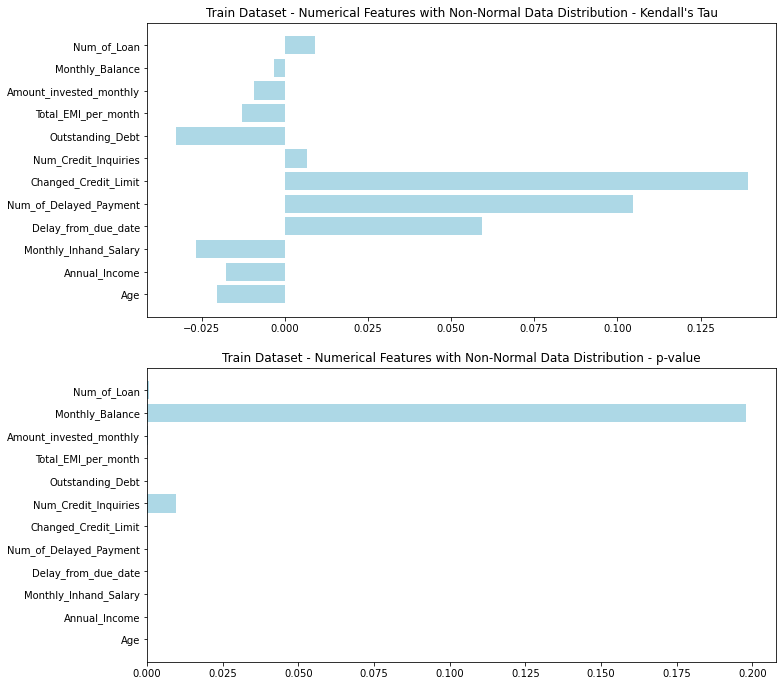

In [33]:
# creating list for storing Kendall's Tau and each corresponding p-values
listtau = []
listpvalue = []
for feature in trainNumNotNormal:
    tau, p_value = kendalltau(train[feature], train['Credit_Score'])
    listtau.append(tau)
    listpvalue.append(p_value)

# creating Kendall's Tau report table
kendallreport = pd.DataFrame({'Feature': trainNumNotNormal, "Kendall's Tau": listtau, 'p-value': listpvalue})
display(kendallreport)

# displaying the Kendall's Tau and corresponding p-values in horizontal bar plots
fig, axes = plt.subplots(2, figsize = (10,10))
fig.tight_layout(pad = 3)
# Kendall's Tau
axes[0].barh(kendallreport['Feature'],
            kendallreport["Kendall's Tau"],
            color = 'lightblue')
axes[0].set_title("Train Dataset - Numerical Features with Non-Normal Data Distribution - Kendall's Tau")
# Corresponding p-values
axes[1].barh(kendallreport['Feature'],
            kendallreport['p-value'],
            color = 'lightblue')
axes[1].set_title("Train Dataset - Numerical Features with Non-Normal Data Distribution - p-value")

plt.show()

From the Kendall's Tau report, there seems that there are no features with strong correlation to the output feature Credit_Score. However, we will still try using the two strongest features compared to the other ones, that are Changed_Credit_Limit and Num_of_Delayed_Payment features. These two features have moderately strong correlation to Credit_Score, with Kendall's Tau over .10. These features also have small p-values (below .05), which indicate different mean values for each sample group.

In [34]:
# feature subset obtained from Kendall's Tau
fsubsetKendall = ['Changed_Credit_Limit', 'Num_of_Delayed_Payment']

### **IIIe. Chi-Squared**

#### **Ordinal and  nominal categorical data**

,Feature,Chi-Squared,p-value
0,Month,5.185210,0.074825
1,Occupation,26.928908,0.000001
2,Credit_Mix,3707.241310,0.000000
3,Payment_of_Min_Amount,3059.015475,0.000000
4,Payment_Behaviour,1732.365067,0.000000


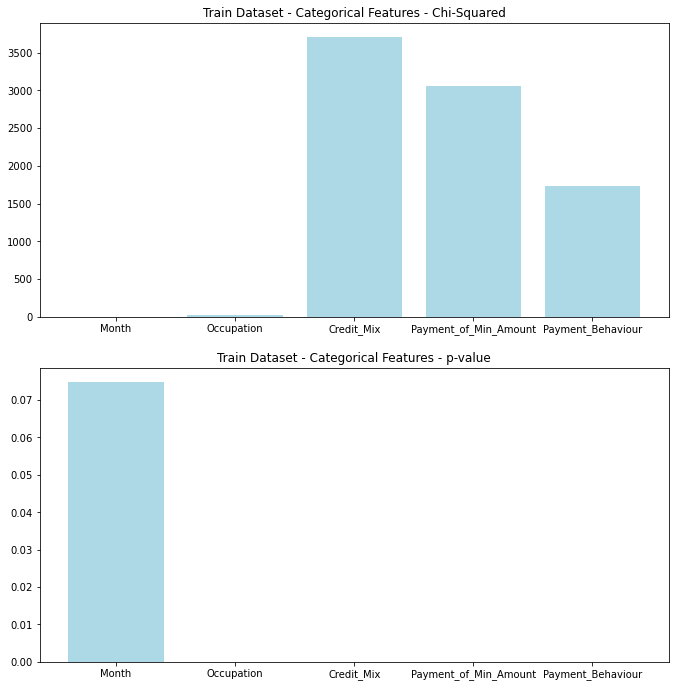

In [35]:
# setting the model to calculate correlation value using Chi-Squared
chi2 = SelectKBest(score_func = chi2, 
                  k = 'all')

# fitting the input and output into the model
chi2input = train[trainCat[:-1]]
chi2response = train['Credit_Score']
chi2.fit(chi2input, chi2response)

# creating Chi-Squared report table
chi2report = pd.DataFrame({'Feature': trainCat[:-1], 'Chi-Squared': chi2.scores_, 'p-value': chi2.pvalues_})
display(chi2report)

# displaying the Chi-Squared values and their corresponding p-values in bar plots
fig, axes = plt.subplots(2, figsize = (10, 10))
fig.tight_layout(pad = 3)
# Chi-Squared
axes[0].bar(chi2report['Feature'],
            chi2report['Chi-Squared'],
            color = 'lightblue')
axes[0].set_title('Train Dataset - Categorical Features - Chi-Squared')
# corresponding p-values
axes[1].bar(chi2report['Feature'],
            chi2report['p-value'],
            color = 'lightblue')
axes[1].set_title('Train Dataset - Categorical Features - p-value')
plt.show()

From the Chi-Squared report, the Credit_Mix, Payment_of_Min_Amount, and Payment_Behaviour features show higher Chi-Squared values compared to the other two categorical values. In short, high Chi-Squared values basically means that the response is dependent to the features being measured. The low corresponding p-values (below .05) also support this result.

In [36]:
# feature subset obtained from Chi-Squared
fsubsetChi = ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

### **IIIf. Mutual Information**

,Feature,Mutual Information
0,Month,0.002531
1,Occupation,0.002612
2,Credit_Mix,0.122620
3,Payment_of_Min_Amount,0.110059
4,Payment_Behaviour,0.006958


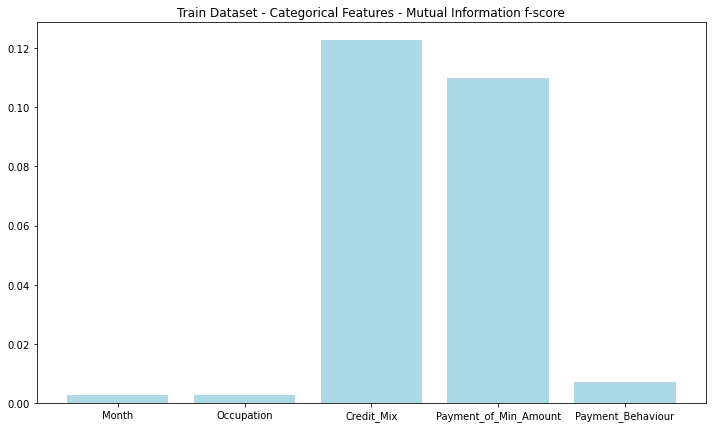

In [37]:
# setting the model to calculate correlation value using Mutual Information
MI = SelectKBest(score_func = mutual_info_classif, 
                k = 'all')

# fitting the input and output into the model
MIinput = train[trainCat[:-1]]
MIresponse = train['Credit_Score']
MI.fit(MIinput, MIresponse)

# creating Mutual Information report table
MIreport = pd.DataFrame({'Feature': trainCat[:-1], 'Mutual Information': MI.scores_})
display(MIreport)

# displaying the Mutual Information values and their corresponding p-values in bar plots
fig = plt.subplots(figsize = (12, 7))
plt.bar(MIreport['Feature'],
       MIreport['Mutual Information'],
       color = 'lightblue')
plt.title('Train Dataset - Categorical Features - Mutual Information f-score')
plt.show()

From the Mutual Information report, the Credit_Mix and Payment_of_Min_Amount features show higher Mutual Information values compared to the other three categorical values. Higher Mutual Information values basically means that the feature and response are dependent of each other. In this method, there are no p values like in the previous methods.

In [38]:
# feature subset obtained from Chi-Squared
fsubsetMI = ['Credit_Mix', 'Payment_of_Min_Amount']

#### **Boolean categorical data**

,Feature,Mutual Information
0,Auto Loan,0.011269
1,Credit-Builder Loan,0.011717
2,Debt Consolidation Loan,0.010145
3,Home Equity Loan,0.009369
4,Mortgage Loan,0.010124
5,Not Specified,0.008843
6,Payday Loan,0.013200
7,Personal Loan,0.008564
8,Student Loan,0.013051


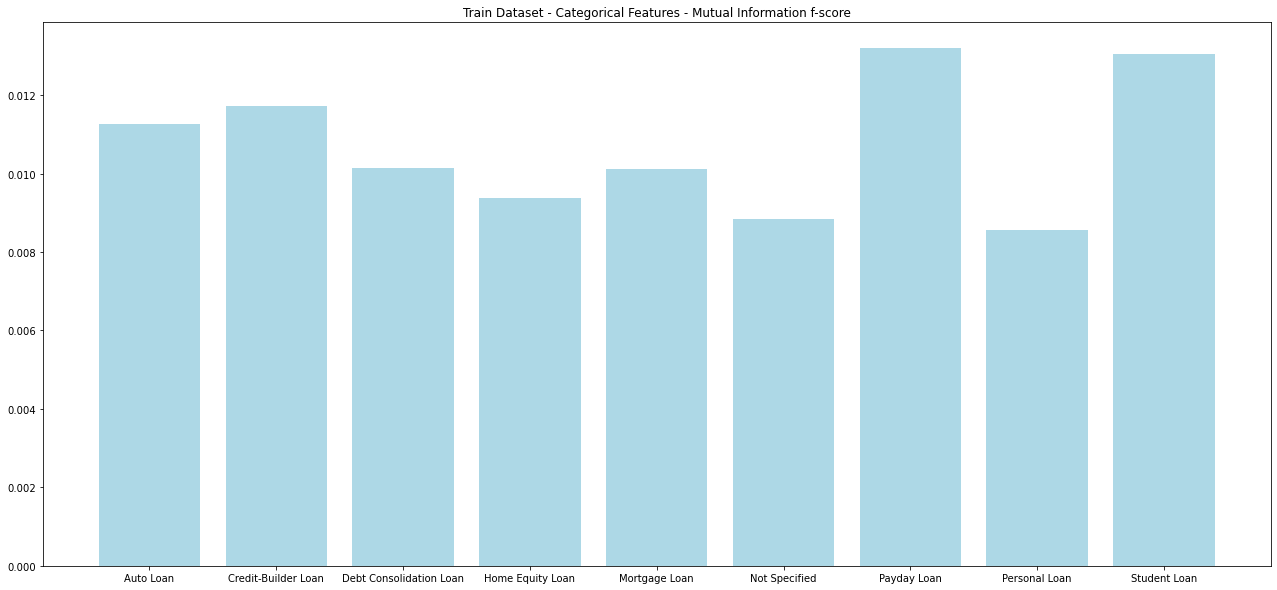

In [39]:
# setting the model to calculate correlation value using Mutual Information
MI = SelectKBest(score_func = mutual_info_classif, 
                k = 'all')

# fitting the input and output into the model
MIinput = train[trainBool]
MIresponse = train['Credit_Score']
MI.fit(MIinput, MIresponse)

# creating Mutual Information report table
MIreport = pd.DataFrame({'Feature': trainBool, 'Mutual Information': MI.scores_})
display(MIreport)

# displaying the Mutual Information values and their corresponding p-values in bar plots
fig = plt.subplots(figsize = (22, 10))
plt.bar(MIreport['Feature'],
       MIreport['Mutual Information'],
       color = 'lightblue')
plt.title('Train Dataset - Categorical Features - Mutual Information f-score')
plt.show()

From the Mutual Information report, there are no boolean feature that has strong or moderate correlation to the output feature Credit_Score. Therefore, we will not be using these features for the machine learning models building, at least independently.

## **IV. Machine Learning Models**

### **IVa. Train Dataset Splitting**

In this project, we indeed have a pair of train and test datasets. However, since the test here does not have the output feature to validate the accuracy of the machine learning models, we need to further split the train dataset into a sub-train dataset and its sub-test counterpart. This way, this later pair can give us the chance to gauge the accuracy of the models that will be built. One important note when splitting the train dataset is to apply a stratification to the output feature Credit_Score, so that each class in this feature has the same proportion both in subtrain and subtest datasets.

In [40]:
# to split a dataset into train and test datasets
from sklearn.model_selection import train_test_split

In [41]:
# splitting the train into subtrain and subtest
subtrain, subtest = train_test_split(train,
                                     test_size = 0.33,
                                     stratify = train['Credit_Score'])

In [42]:
# checking the size of subtrain and subtest datasets
print('Subtrain dataset shape :', subtrain.shape)
print('Subtest dataset shape  :', subtest.shape)

Subtrain dataset shape : (67000, 32)
Subtest dataset shape  : (33000, 32)


In [43]:
# checking the proportion of each class in Credit_Score

# getting the unique value in Credit_Score for subtrain dataset
listCreditScore = subtrain['Credit_Score'].unique()

# getting the count of each unique value for subtrain dataset
listcount = []
for CreditScore in listCreditScore:
    count = (subtrain['Credit_Score'] == CreditScore).sum()
    listcount.append(count)

# getting the percentage of each unique value for subtrain dataset
listcountperc = []
for CreditScore in listCreditScore:
    perc = (subtrain['Credit_Score'] == CreditScore).sum() / len(subtrain['Credit_Score'])
    listcountperc.append(perc)
    
# creating split report for subtrain dataset
splitreporttrain = pd.DataFrame({'Class': subtrain['Credit_Score'].unique(),
                                'Count': listcount,
                                'Percentage': listcountperc})

# displaying the split report for subtrain
display(splitreporttrain.sort_values('Class'))
print('Subtrain Credit_Score class proportions')

# getting the unique value in Credit_Score for subtest dataset
listCreditScore = subtest['Credit_Score'].unique()

# getting the count of each unique value for subtest dataset
listcount = []
for CreditScore in listCreditScore:
    count = (subtest['Credit_Score'] == CreditScore).sum()
    listcount.append(count)

# getting the percentage of each unique value for subtest dataset
listcountperc = []
for CreditScore in listCreditScore:
    perc = (subtest['Credit_Score'] == CreditScore).sum() / len(subtest['Credit_Score'])
    listcountperc.append(perc)
    
# creating split report for subtrain dataset
splitreporttest = pd.DataFrame({'Class': subtest['Credit_Score'].unique(),
                                'Count': listcount,
                                'Percentage': listcountperc})

# displaying the split report for subtrain
display(splitreporttest.sort_values('Class'))
print('Subtest Credit_Score class proportions')

,Class,Count,Percentage
0,0,11945,0.178284
2,1,19429,0.289985
1,2,35626,0.531731


Subtrain Credit_Score class proportions


,Class,Count,Percentage
1,0,5883,0.178273
2,1,9569,0.289970
0,2,17548,0.531758


Subtest Credit_Score class proportions


The Credit_Score class proportions is the same for both subtrain and subtest datasets. The shape of each dataset also tells that the split has been done successfully. Let's now separate the output feature from the input features on both datasets.

In [44]:
# subtrain
X_subtrain = subtrain[subtrain.columns[:-1]] # input features
y_subtrain = subtrain[subtrain.columns[-1]]  # output feature

# subtest
X_subtest = subtest[subtest.columns[:-1]] # input features
y_subtest = subtest[subtest.columns[-1]]  # output feature

### **IVb. Random Forest**

#### **Feature subset preparation**

In practices, Random Forest model can learn both numerical and cateogical data as the inputs. Let's recall the subset of features selected from previous step.

In [46]:
# numerical data with normal data distribution
print(fsubsetANOVA)

# numerical data with non-normal data distribution
print(fsubsetKendall)

# categorical data using Chi-Squared
print(fsubsetChi)

# categorical data using Mutual Information
print(fsubsetMI)

['Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Credit_History_Age']
['Changed_Credit_Limit', 'Num_of_Delayed_Payment']
['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
['Credit_Mix', 'Payment_of_Min_Amount']


Considering that Random Forest can run both numerical and categorical data, let's also combine the best correlating features into a single list to later be used as the model input.

In [47]:
# joining these best correlating features into a single list
fsubsetNumCat = fsubsetANOVA + fsubsetKendall + fsubsetChi

# joining the best correlating features and including boolean features in them
fsubsetBool = (train.columns[22:-1]).tolist() # storing boolean features into a list
fsubsetComplete = fsubsetNumCat + fsubsetBool

#### **Defining the parameters for the RF model**

In the Random Forest model, there are some important parameters that need to be set. The parameters that will be set are as follow:
*   criterion: The function to measure the quality of a split
*   min_sample_leaf: The minimum number of samples required to split an internal node
*   n_estimator: The number of trees in the forest
*   max_features: The number of features to consider when looking for the best split
*   max_depth: The maximum depth of the tree

In [48]:
# criterion
criterion = ['gini', 'entropy']

# min_sample leaf
min_sample_leaf = [1, 2, 4]

# n_estimator
n_estimator = [64, 128]

# max_features
max_features = ['sqrt', 'log2']

# max_depth
max_depth = []
for i in range (0, 10, 3):
    max_depth.append(i)
max_depth.append(None)
max_depth.pop(0)

# assigning the parameters into a parameter grid
parameter_grid = {'criterion': criterion,
                 'min_samples_leaf': min_sample_leaf,
                 'n_estimators': n_estimator,
                 'max_features': max_features,
                 'max_depth': max_depth}
parameter_grid

{'criterion': ['gini', 'entropy'],
 'min_samples_leaf': [1, 2, 4],
 'n_estimators': [64, 128],
 'max_features': ['sqrt', 'log2'],
 'max_depth': [3, 6, 9, None]}

#### **Best correlating numerical and categorical features**

In [49]:
# the machine learning model that will be used
rf = RandomForestClassifier()

# assigning the parameter grid into the model
rfNumCat = GridSearchCV(estimator = rf,
                        param_grid = parameter_grid,
                        n_jobs = 8,
                        cv = 3,
                        verbose = 2)

# assigning the data into the random model
rfNumCat.fit(X_subtrain[fsubsetNumCat], y_subtrain)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=8,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 6, 9, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [64, 128]},
             verbose=2)

In [50]:
# best subset of parameters obtained from Grid Search CV
rfNumCat.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'n_estimators': 128}

In [51]:
# Setting up the model using the best subset of parameters
RFClassifier = RandomForestClassifier(criterion = 'gini',
                                      max_depth = None,
                                      max_features = 'log2',
                                      min_samples_leaf = 1,
                                      n_estimators = 128)

# Fitting the 'train' data into the model
RFClassifier.fit(X_subtrain[fsubsetNumCat], y_subtrain)

# Predicting the 'test' dataset
RFpred = RFClassifier.predict(X_subtest[fsubsetNumCat])

# Getting the accuracy of the model
accjoined = RFClassifier.score(X_subtest[fsubsetNumCat], y_subtest)

# General accuracy report
print('Random Forest Classifier model accuracy: {:.2f}%'.format(accjoined*100))

Random Forest Classifier model accuracy: 76.26%


#### **Best correlating numerical features with normal data distribution**

In [52]:
# assigning the parameter grid into the model
rfANOVA = GridSearchCV(estimator = rf,
                        param_grid = parameter_grid,
                        n_jobs = 8,
                        cv = 3,
                        verbose = 2)

# assigning the data into the random model
rfANOVA.fit(X_subtrain[fsubsetANOVA], y_subtrain)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=8,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 6, 9, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [64, 128]},
             verbose=2)

In [53]:
# best subset of parameters obtained from Grid Search CV
rfANOVA.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'n_estimators': 128}

In [54]:
# Setting up the model using the best subset of parameters
RFClassifier = RandomForestClassifier(criterion = 'entropy',
                                      max_depth = None,
                                      max_features = 'log2',
                                      min_samples_leaf = 2,
                                      n_estimators = 128)

# Fitting the 'train' data into the model
RFClassifier.fit(X_subtrain[fsubsetANOVA], y_subtrain)

# Predicting the 'test' dataset
RFpred = RFClassifier.predict(X_subtest[fsubsetANOVA])

# Getting the accuracy of the model
accANOVA = RFClassifier.score(X_subtest[fsubsetANOVA], y_subtest)

# General accuracy report
print('Random Forest Classifier model accuracy: {:.2f}%'.format(accANOVA*100))

Random Forest Classifier model accuracy: 75.81%


#### **Best correlating numerical features with non-normal data distribution**

In [55]:
# assigning the parameter grid into the model
rfKendall = GridSearchCV(estimator = rf,
                        param_grid = parameter_grid,
                        n_jobs = 8,
                        cv = 3,
                        verbose = 2)

# assigning the data into the random model
rfKendall.fit(X_subtrain[fsubsetKendall], y_subtrain)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=8,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 6, 9, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [64, 128]},
             verbose=2)

In [56]:
# best subset of parameters obtained from Grid Search CV
rfKendall.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 128}

In [57]:
# Setting up the model using the best subset of parameters
RFClassifier = RandomForestClassifier(criterion = 'entropy',
                                      max_depth = None,
                                      max_features = 'log2',
                                      min_samples_leaf = 1,
                                      n_estimators = 64)

# Fitting the 'train' data into the model
RFClassifier.fit(X_subtrain[fsubsetKendall], y_subtrain)

# Predicting the 'test' dataset
RFpred = RFClassifier.predict(X_subtest[fsubsetKendall])

# Getting the accuracy of the model
accKendall = RFClassifier.score(X_subtest[fsubsetKendall], y_subtest)

# General accuracy report
print('Random Forest Classifier model accuracy: {:.2f}%'.format(accKendall*100))

Random Forest Classifier model accuracy: 60.18%


#### **Best correlating categorical features obtained by Chi-Squared**

In [58]:
# assigning the parameter grid into the model
rfChi = GridSearchCV(estimator = rf,
                    param_grid = parameter_grid,
                    n_jobs = 8,
                    cv = 3,
                    verbose = 2)

# assigning the data into the random model
rfChi.fit(X_subtrain[fsubsetChi], y_subtrain)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=8,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 6, 9, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [64, 128]},
             verbose=2)

In [59]:
# best subset of parameters obtained from Grid Search CV
rfChi.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'n_estimators': 64}

In [60]:
# Setting up the model using the best subset of parameters
RFClassifier = RandomForestClassifier(criterion = 'gini',
                                      max_depth = 6,
                                      max_features = 'sqrt',
                                      min_samples_leaf = 1,
                                      n_estimators = 128)

# Fitting the 'train' data into the model
RFClassifier.fit(X_subtrain[fsubsetChi], y_subtrain)

# Predicting the 'test' dataset
RFpred = RFClassifier.predict(X_subtest[fsubsetChi])

# Getting the accuracy of the model
accChi = RFClassifier.score(X_subtest[fsubsetChi], y_subtest)

# General accuracy report
print('Random Forest Classifier model accuracy: {:.2f}%'.format(accChi*100))

Random Forest Classifier model accuracy: 59.46%


#### **Best correlating categorical features obtained by Mutual Information**

In [61]:
# assigning the parameter grid into the model
rfMI = GridSearchCV(estimator = rf,
                    param_grid = parameter_grid,
                    n_jobs = 8,
                    cv = 3,
                    verbose = 2)

# assigning the data into the random model
rfMI.fit(X_subtrain[fsubsetMI], y_subtrain)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=8,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 6, 9, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [64, 128]},
             verbose=2)

In [62]:
# best subset of parameters obtained from Grid Search CV
rfMI.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 64}

In [63]:
# Setting up the model using the best subset of parameters
RFClassifier = RandomForestClassifier(criterion = 'gini',
                                      max_depth = 6,
                                      max_features = 'sqrt',
                                      min_samples_leaf = 1,
                                      n_estimators = 64)

# Fitting the 'train' data into the model
RFClassifier.fit(X_subtrain[fsubsetMI], y_subtrain)

# Predicting the 'test' dataset
RFpred = RFClassifier.predict(X_subtest[fsubsetMI])

# Getting the accuracy of the model
accMI = RFClassifier.score(X_subtest[fsubsetMI], y_subtest)

# General accuracy report
print('Random Forest Classifier model accuracy: {:.2f}%'.format(accMI*100))

Random Forest Classifier model accuracy: 59.55%


#### **Trying all correlating features plus boolean features as the input**

In [64]:
# assigning the parameter grid into the model
rfBoolJoined = GridSearchCV(estimator = rf,
                            param_grid = parameter_grid,
                            n_jobs = 8,
                            cv = 3,
                            verbose = 2)

# assigning the data into the random model
rfBoolJoined.fit(X_subtrain[fsubsetComplete], y_subtrain)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=8,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 6, 9, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [64, 128]},
             verbose=2)

In [65]:
# best subset of parameters obtained from Grid Search CV
rfBoolJoined.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'n_estimators': 128}

In [66]:
# Setting up the model using the best subset of parameters
RFClassifier = RandomForestClassifier(criterion = 'gini',
                                      max_depth = None,
                                      max_features = 'log2',
                                      min_samples_leaf = 1,
                                      n_estimators = 64)

# Fitting the 'train' data into the model
RFClassifier.fit(X_subtrain[fsubsetComplete], y_subtrain)

# Predicting the 'test' dataset
RFpred = RFClassifier.predict(X_subtest[fsubsetComplete])

# Getting the accuracy of the model
accComplete = RFClassifier.score(X_subtest[fsubsetComplete], y_subtest)

# General accuracy report
print('Random Forest Classifier model accuracy: {:.2f}%'.format(accComplete*100))

Random Forest Classifier model accuracy: 78.27%


After including the boolean features into the already best correlating features as the input, the Random Forest model further increased its performance approximately 2%, from 76% to 78%, being the highest for now. For the Random Forest model, we will be using this subset of features as the input.

#### **RF models accuracy report**

,Input,Accuracy
0,fsubsetNumCat,0.762636
1,fsubsetANOVA,0.758121
2,fsubsetKendall,0.601758
3,fsubsetChi,0.594636
4,fsubsetMI,0.595485
5,fsubsetComplete,0.782727


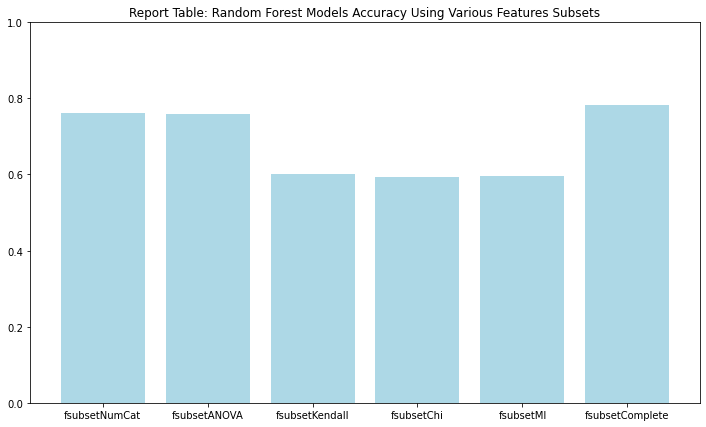

In [67]:
# storing the models accuracy in a list
listacc = [accjoined,
          accANOVA,
          accKendall,
          accChi,
          accMI,
          accComplete]

# storing the features subset names into a list
listinput = ['fsubsetNumCat',
            'fsubsetANOVA',
            'fsubsetKendall',
            'fsubsetChi',
            'fsubsetMI',
            'fsubsetComplete']

# creating Random Forest models accuracy report table
AllAccReport = pd.DataFrame({'Input': listinput, 'Accuracy': listacc})
display(AllAccReport)

# displaying the report in bar plots
fig = plt.subplots(figsize = (12, 7))
plt.bar(AllAccReport['Input'],
       AllAccReport['Accuracy'],
       color = 'lightblue')
plt.title('Report Table: Random Forest Models Accuracy Using Various Features Subsets')
plt.ylim(0, 1)
plt.show()

#### **Overfitting Test**

Now that we have decided to use fsubsetNumComplete as the input subset of features for the Random Forest model, let's check if the model overfits and if so, look for a way to handle it.

In [68]:
# Setting up the model using the previous setup
RFClassifier = RandomForestClassifier(criterion = 'gini',
                                      max_depth = None,
                                      max_features = 'log2',
                                      min_samples_leaf = 1,
                                      n_estimators = 64)

# Fitting the 'train' data into the model
RFClassifier.fit(X_subtrain[fsubsetComplete], y_subtrain)

# Predicting the 'test' dataset
RFpred = RFClassifier.predict(X_subtest[fsubsetComplete])

# Getting the accuracy of the model
accComplete = RFClassifier.score(X_subtest[fsubsetComplete], y_subtest)

# Accuracy report using test dataset
print('Random Forest Classifier model accuracy using test dataset: {:.2f}%'.format(accComplete*100))

# Accuracy report reusing train dataset
RFpred2 = RFClassifier.predict(X_subtrain[fsubsetComplete])
accComplete2 = RFClassifier.score(X_subtrain[fsubsetComplete], y_subtrain)
print('Random Forest Classifier model accuracy using train dataset: {:.2f}%'.format(accComplete2*100))

Random Forest Classifier model accuracy using test dataset: 78.06%
Random Forest Classifier model accuracy using train dataset: 99.98%


By letting the model to learn the train dataset using the subset of parameters obtained previously from the GridSearchCV, the model returns an accuracy value of 78.64% when it predicts the test dataset. When the model is told to predict the train dataset once more, it returns an accuracy value of 99.99%. This indicates an occurence of overfitting in the model. Overfitting is clearly an issue, especially when we are going to try predicting unseen data later in the test dataset, predicting the Credit_Score value for each customer from September until December. Let's tune the parameter once again and see if we can handle this situation. 

**Checking how the variation of max_depth parameter affects the accuracy on both datasets**

In [69]:
# creating lists to store the accuracy results
acctest = []
acctrain = []
iteration = [i for i in range(1, 30, 3)]
# iterating the max_depth parameter in the Random Forest model
for i in iteration:
    RFClassifier = RandomForestClassifier(criterion = 'gini',
                                          max_depth = i,
                                          max_features = 'log2',
                                          min_samples_leaf = 1,
                                          n_estimators = 64)

    # Fitting the subtrain data into the model
    RFClassifier.fit(X_subtrain[fsubsetComplete], y_subtrain)

    # Predicting the subtest dataset
    RFpred = RFClassifier.predict(X_subtest[fsubsetComplete])

    # Getting the accuracy of the model using subtest
    accComplete = RFClassifier.score(X_subtest[fsubsetComplete], y_subtest)
    acctest.append(accComplete)
    
    # Re-predicting the subtrain dataset
    RFpred2 = RFClassifier.predict(X_subtrain[fsubsetComplete])
   
    # Getting the accuracy of the model using subtest
    accComplete2 = RFClassifier.score(X_subtrain[fsubsetComplete], y_subtrain)
    acctrain.append(accComplete2)

,Accuracy using subtest,Accuracy using subtrain
0,0.570909,0.570627
1,0.641000,0.642791
2,0.677152,0.685791
3,0.697182,0.718642
4,0.719212,0.776687
5,0.748576,0.870448
6,0.769424,0.949254
7,0.774182,0.983522
8,0.778636,0.997164
9,0.782242,0.999388


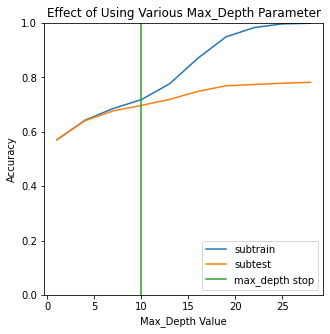

In [70]:
# creating the report
RFoverfittest = pd.DataFrame({'Accuracy using subtest': acctest, 'Accuracy using subtrain': acctrain})
display(RFoverfittest)

# displaying the accuracy test
fig = plt.subplots(figsize = (5, 5))
plt.plot(iteration, acctrain, label = 'subtrain')
plt.plot(iteration, acctest, label = 'subtest')
plt.plot([10, 10], [0, 1], label = 'max_depth stop')
plt.title('Effect of Using Various Max_Depth Parameter')
plt.xlabel('Max_Depth Value')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.show()

**Checking how the variation of min_samples_leaf parameter affects the accuracy of both datasets**

In [71]:
# creating lists to store the accuracy results
acctest = []
acctrain = []
iteration = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
# iterating the max_depth parameter in the Random Forest model
for i in iteration:
    RFClassifier = RandomForestClassifier(criterion = 'gini',
                                          max_depth = None,
                                          max_features = 'log2',
                                          min_samples_leaf = i,
                                          n_estimators = 64)

    # Fitting the subtrain data into the model
    RFClassifier.fit(X_subtrain[fsubsetComplete], y_subtrain)

    # Predicting the subtest dataset
    RFpred = RFClassifier.predict(X_subtest[fsubsetComplete])

    # Getting the accuracy of the model using subtest
    accComplete = RFClassifier.score(X_subtest[fsubsetComplete], y_subtest)
    acctest.append(accComplete)
    
    # Re-predicting the subtrain dataset
    RFpred2 = RFClassifier.predict(X_subtrain[fsubsetComplete])
   
    # Getting the accuracy of the model using subtest
    accComplete2 = RFClassifier.score(X_subtrain[fsubsetComplete], y_subtrain)
    acctrain.append(accComplete2)

,Accuracy using subtest,Accuracy using subtrain
0,0.783394,0.999672
1,0.759727,0.855343
2,0.739727,0.803940
3,0.730182,0.778955
4,0.720667,0.760761
5,0.715515,0.750075
6,0.711030,0.740970
7,0.706333,0.733910
8,0.704606,0.731000
9,0.703364,0.724985


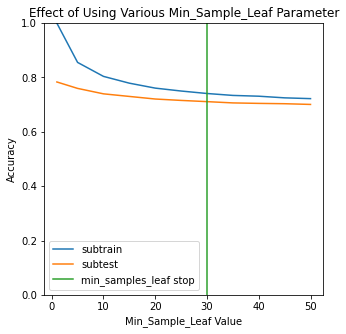

In [72]:
# creating the report
RFoverfittest = pd.DataFrame({'Accuracy using subtest': acctest, 'Accuracy using subtrain': acctrain})
display(RFoverfittest)

# displaying the accuracy test
fig = plt.subplots(figsize = (5, 5))
plt.plot(iteration, acctrain, label = 'subtrain')
plt.plot(iteration, acctest, label = 'subtest')
plt.plot([30,30], [0,1], label = 'min_samples_leaf stop')
plt.title('Effect of Using Various Min_Sample_Leaf Parameter')
plt.xlabel('Min_Sample_Leaf Value')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.show()

**Refitting the Random Forest model using the updated parameters**

In [73]:
# Setting up the model using the previous setup
RFClassifier = RandomForestClassifier(criterion = 'gini',
                                      max_depth = 10,
                                      max_features = 'log2',
                                      min_samples_leaf = 30,
                                      n_estimators = 64)

# Fitting the 'train' data into the model
RFClassifier.fit(X_subtrain[fsubsetComplete], y_subtrain)

# Predicting the 'test' dataset
RFpred = RFClassifier.predict(X_subtest[fsubsetComplete])

# Getting the accuracy of the model
accComplete = RFClassifier.score(X_subtest[fsubsetComplete], y_subtest)

# Accuracy report using test dataset
print('Random Forest Classifier model accuracy using test dataset: {:.2f}%'.format(accComplete*100))

# Accuracy report reusing train dataset
RFpred2 = RFClassifier.predict(X_subtrain[fsubsetComplete])
accComplete2 = RFClassifier.score(X_subtrain[fsubsetComplete], y_subtrain)
print('Random Forest Classifier model accuracy using train dataset: {:.2f}%'.format(accComplete2*100))

Random Forest Classifier model accuracy using test dataset: 69.43%
Random Forest Classifier model accuracy using train dataset: 70.63%


The accuracy of the model when fed with subtest and subtrain datasets is now similar. Although the accuracy of the Random Forest model is now decreased compared to the first one developed, in a sense this updated model is still better, because now the model with the updated parameters shows a consistent accuracy on both the subtrain dataset, which it learns from, and the subtest dataset. This means that the model is now more likely in tune between how it learns a dataset and how it interprets unseen data.

### **IVc. Logistic Regression**

In practices, Logistic Regression model can learn both numerical and cateogical data as the inputs. Let's first define the parameters that are going to be used in the model.

#### **Defining the parameters for the logrec model**

In the Logistic Regression model, there are some parameters that we can adjust to tune the model performance. The parameters that will be included are as follow:
*   solver: Coordinate Descent algorithm that solves optimization problems
*   penalty: a regularization that prevents models to be overcomplicated
*   c: value that tells the model how to weight the training dataset

In [74]:
# Logistic Regression parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'lbfgs']
penalties = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# compiling the parameters
parameter_grid = dict(solver = solvers,
                      penalty = penalties,
                      C = c_values)

# displaying the parameter_grid
parameter_grid

{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'lbfgs'],
 'penalty': ['l2'],
 'C': [100, 10, 1.0, 0.1, 0.01]}

#### **Building the logrec Models**

In [75]:
# storing the features subsets in a list
listfsubset = [fsubsetNumCat,
               fsubsetANOVA,
               fsubsetKendall,
               fsubsetChi,
               fsubsetMI,
               fsubsetComplete]

# creating list to store best subset of parameter
listparamsubset = []

# creating list to store model accuracy
listaccuracy = []

# iterating features subsets to the Logistic Regression model
logrec = LogisticRegression()
for fsubset in listfsubset:
    # creating the grid model
    logrecGrid = GridSearchCV(estimator = logrec,
                              param_grid = parameter_grid,
                              n_jobs = 8,
                              verbose = 2)
    
    # assigning the data into the grid model
    logrecGrid.fit(X_subtrain[fsubset], y_subtrain)
    listparamsubset.append(logrecGrid.best_params_)

    # setting up the model using the best subset of parameters
    logrec.set_params(**logrecGrid.best_params_)

    # fitting the subtrain data into the model
    logrec.fit(X_subtrain[fsubset], y_subtrain)
    
    # predicting the subtest dataset
    logrecPred = logrec.predict(X_subtest[fsubset])
    
    # getting the accuracy of the model
    acc = logrec.score(X_subtest[fsubset], y_subtest)
    listaccuracy.append(acc)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


,Feature Subset,c_value,Penalty,Solver,Accuracy
0,NumCat,100.00,l2,newton-cg,0.633788
1,ANOVA,100.00,l2,newton-cg,0.612303
2,Kendall,0.10,l2,newton-cg,0.560485
3,Chi2,100.00,l2,newton-cg,0.551515
4,MI,100.00,l2,newton-cg,0.549333
5,Complete,0.01,l2,newton-cg,0.632879


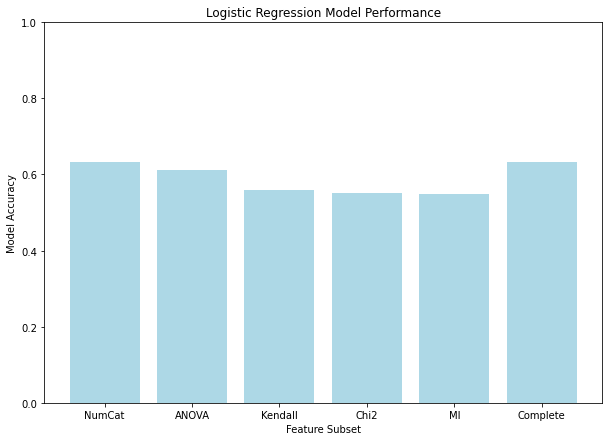

In [76]:
# extracting the Logistic Regression parameters dictionary
listvalues = []
for subset in range(len(listparamsubset)):
    values = []
    items = listparamsubset[subset].items()
    for item in items:
        values.append(item[1])
    listvalues.append(values)

# storing the Logistic Regression parameters
resultc = []
resultpenalty= []
resultsolver = []
for item in range(len(listvalues)):
    resultc.append(listvalues[item][0])
    resultpenalty.append(listvalues[item][1])
    resultsolver.append(listvalues[item][2])

# creating the list of fsubset name
listfsubsetname = ['NumCat',
                  'ANOVA',
                  'Kendall',
                  'Chi2',
                  'MI',
                  'Complete']

# creating the Logistic Regression model performance
logrecReport = pd.DataFrame({'Feature Subset': listfsubsetname,
                            'c_value': resultc,
                            'Penalty': resultpenalty,
                            'Solver': resultsolver,
                            'Accuracy': listaccuracy})
display(logrecReport)

# displaying the Logistic Regression model performance
fig = plt.subplots(figsize = (10, 7))
plt.bar(logrecReport['Feature Subset'],
       logrecReport['Accuracy'],
       color = 'lightblue')
plt.title('Logistic Regression Model Performance')
plt.xlabel('Feature Subset')
plt.ylabel('Model Accuracy')
plt.ylim(0, 1)
plt.show()

From the Logistic Regression Model performance report, we can gather that the model works best using the fsubsetNumCat as the feature subset. We will be using this configuration in the further overfitting test and tuning.

#### **Overfitting Test**

Now that we have decided to use fsubsetNumCat as the input subset of features for the Logistic Regression model, let's check if the model overfits and if so, look for a way to handle it.

In [77]:
# Setting up the model using the previous setup
logrec = LogisticRegression(C = 0.01,
                            penalty = 'l2',
                            solver = 'newton-cg')

# Fitting the 'train' data into the model
logrec.fit(X_subtrain[fsubsetNumCat], y_subtrain)

# Predicting the 'test' dataset
logrecPred = logrec.predict(X_subtest[fsubsetNumCat])

# Getting the accuracy of the model
accComplete = logrec.score(X_subtest[fsubsetNumCat], y_subtest)

# Accuracy report using test dataset
print('Logistic Regression model accuracy using test dataset: {:.2f}%'.format(accComplete*100))

# Accuracy report reusing train dataset
logrecPred2 = logrec.predict(X_subtrain[fsubsetNumCat])
accComplete2 = logrec.score(X_subtrain[fsubsetNumCat], y_subtrain)
print('Logistic Regression model accuracy using train dataset: {:.2f}%'.format(accComplete2*100))

Logistic Regression model accuracy using test dataset: 63.36%
Logistic Regression model accuracy using train dataset: 63.02%


The accuracy of the model developed using the subtrain dataset with fsubsetNumCat feature subset as the input shows a little difference when implemented on the subtest dataset and when retested on the subtrain dataset. This give an indication that the model is not overfitted. Therefore, we will use this current configuration for the Logistic Regression model.

### **IVd. K-Nearest Neighbors**

Just like the previous models, K-Nearest Neighbors can also deal with both numerical and categorical data as the input. Let's first define some parameters that are going to used in the model building.

#### **Defining the parameters for the KNN model**

In the KNN model, there are some parameters that we can adjust to tune the model performance. The parameters that will be included are as follow:
*   n_neighbors: number of neighbors to include in a classification cluster
*   metric: distance metric to calculate the distance to nearest data neighbors
*   weights: function to give more weight to nearby data

In [78]:
# Logistic Regression parameters
n_neighbors = [i for i in range(1, 25, 2)]
metric = ['euclidean', 'manhattan', 'minkowski']
weights = ['uniform', 'distance']

# compiling the parameters
parameter_grid = dict(n_neighbors = n_neighbors,
                      weights = weights,
                      metric = metric)

# displaying the parameter_grid
parameter_grid

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23],
 'weights': ['uniform', 'distance'],
 'metric': ['euclidean', 'manhattan', 'minkowski']}

#### **Building the KNN Models**

In [79]:
# creating list to store best subset of parameter
listparamsubset = []

# creating list to store model accuracy
listaccuracy = []

# iterating features subsets to the Logistic Regression model
knn = KNeighborsClassifier()
for fsubset in listfsubset:
    # creating the grid model
    knnGrid = GridSearchCV(estimator = knn,
                           param_grid = parameter_grid,
                           n_jobs = 8,
                           cv = 3,
                           verbose = 2)
    
    # assigning the data into the grid model
    knnGrid.fit(X_subtrain[fsubset], y_subtrain)
    listparamsubset.append(knnGrid.best_params_)

    # setting up the model using the best subset of parameters
    knn.set_params(**knnGrid.best_params_)

    # fitting the subtrain data into the model
    knn.fit(X_subtrain[fsubset], y_subtrain)
    
    # predicting the subtest dataset
    knnPred = knn.predict(X_subtest[fsubset])
    
    # getting the accuracy of the model
    acc = knn.score(X_subtest[fsubset], y_subtest)
    listaccuracy.append(acc)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Fitting 3 folds for each of 72 candidates, totalling 216 fits


,Feature Subset,n_neighbors,Metric,Weight,Accuracy
0,NumCat,5,manhattan,distance,0.762727
1,ANOVA,7,manhattan,distance,0.684182
2,Kendall,23,euclidean,distance,0.607848
3,Chi2,17,euclidean,uniform,0.557061
4,MI,19,euclidean,uniform,0.561333
5,Complete,5,manhattan,distance,0.789242


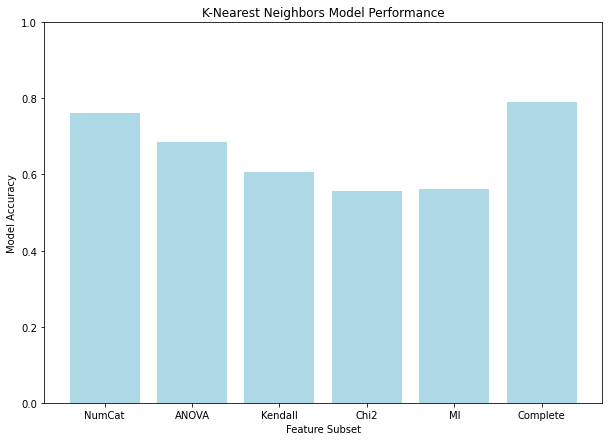

In [80]:
# extracting the K-Nearest Neighors parameters dictionary
listvalues = []
for subset in range(len(listparamsubset)):
    values = []
    items = listparamsubset[subset].items()
    for item in items:
        values.append(item[1])
    listvalues.append(values)

# storing the K-Nearest Neighors parameters
resultn = []
resultweight= []
resultmetric = []
for item in range(len(listvalues)):
    resultmetric.append(listvalues[item][0])
    resultn.append(listvalues[item][1])
    resultweight.append(listvalues[item][2])

# creating the list of fsubset name
listfsubsetname = ['NumCat',
                  'ANOVA',
                  'Kendall',
                  'Chi2',
                  'MI',
                  'Complete']

# creating the K-Nearest Neighors model performance
knnReport = pd.DataFrame({'Feature Subset': listfsubsetname,
                          'n_neighbors': resultn,
                          'Metric': resultmetric,
                          'Weight': resultweight,
                          'Accuracy': listaccuracy})
display(knnReport)

# displaying the K-Nearest Neighors model performance
fig = plt.subplots(figsize = (10, 7))
plt.bar(knnReport['Feature Subset'],
       knnReport['Accuracy'],
       color = 'lightblue')
plt.title('K-Nearest Neighbors Model Performance')
plt.xlabel('Feature Subset')
plt.ylabel('Model Accuracy')
plt.ylim(0, 1)
plt.show()

From the K-Nearest Neighbors Model performance report, we can gather that the model works best using the fsubsetComplete as the feature subset. We will be using this configuration in the further overfitting test and tuning.

#### **Overfitting Test**

Now that we have decided to use fsubsetComplete as the input subset of features for the K-Nearest Neighbors model, let's check if the model overfits and if so, look for a way to handle it.

In [81]:
# Setting up the model using the previous setup
knn = KNeighborsClassifier(n_neighbors = 3,
                           weights = 'distance',
                           metric = 'manhattan')

# Fitting the 'train' data into the model
knn.fit(X_subtrain[fsubsetComplete], y_subtrain)

# Predicting the 'test' dataset
knnPred = knn.predict(X_subtest[fsubsetComplete])

# Getting the accuracy of the model
accComplete = knn.score(X_subtest[fsubsetComplete], y_subtest)

# Accuracy report using test dataset
print('K-Nearest Neighbors model accuracy using test dataset: {:.2f}%'.format(accComplete*100))

# Accuracy report reusing train dataset
knnPred2 = knn.predict(X_subtrain[fsubsetComplete])
accComplete2 = knn.score(X_subtrain[fsubsetComplete], y_subtrain)
print('K-Nearest Neighbors model accuracy using train dataset: {:.2f}%'.format(accComplete2*100))

K-Nearest Neighbors model accuracy using test dataset: 79.12%
K-Nearest Neighbors model accuracy using train dataset: 100.00%


From the overfit test, there is a big difference in model accuracy when predicting the subtest and subtrain datasets. This indicates that the model overfits.

**Checking how the variation of n_neighbors parameter affects the accuracy on both datasets**

In [82]:
# creating lists to store the accuracy results
acctest = []
acctrain = []
iteration = [5, 50, 500, 2500]
# iterating the max_depth parameter in the Random Forest model
for i in iteration:
    knn = KNeighborsClassifier(n_neighbors = i,
                               weights = 'distance',
                               metric = 'manhattan')
    # Fitting the subtrain data into the model
    knn.fit(X_subtrain[fsubsetComplete], y_subtrain)

    # Predicting the subtest dataset
    knnPred = knn.predict(X_subtest[fsubsetComplete])

    # Getting the accuracy of the model using subtest
    accComplete = knn.score(X_subtest[fsubsetComplete], y_subtest)
    acctest.append(accComplete)
    
    # Re-predicting the subtrain dataset
    knnPred2 = knn.predict(X_subtrain[fsubsetComplete])
   
    # Getting the accuracy of the model using subtest
    accComplete2 = knn.score(X_subtrain[fsubsetComplete], y_subtrain)
    acctrain.append(accComplete2)

,Accuracy using subtest,Accuracy using subtrain
0,0.789242,1.0
1,0.721818,1.0
2,0.666970,1.0
3,0.631788,1.0


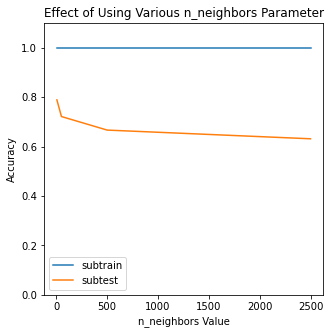

In [83]:
# creating the report
knnoverfittest = pd.DataFrame({'Accuracy using subtest': acctest, 'Accuracy using subtrain': acctrain})
display(knnoverfittest)

# displaying the accuracy test
fig = plt.subplots(figsize = (5, 5))
plt.plot(iteration, acctrain, label = 'subtrain')
plt.plot(iteration, acctest, label = 'subtest')
plt.title('Effect of Using Various n_neighbors Parameter')
plt.xlabel('n_neighbors Value')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)
plt.legend()
plt.show()

There is no notable change in the accuracy of the model using the subtrain dataset with increasing n_neighbors value. A different approach will be made this time, using some scalers to the data in some features that will act as the input for the model.

**Scaling the best correlating numerical features in both subtrain and subtest dataset**

The scaling methods that will be used to scale the best correlating numerical features are StandardScaler, MinMaxScaler, and RobustScaler. All three will be used and later be compared.

In [84]:
# recalling the best-correlating numerical features
print(fsubsetANOVA) # numerical data with normal data distribution
print(fsubsetKendall) # numerical data with non-normal data distribution

['Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Credit_History_Age']
['Changed_Credit_Limit', 'Num_of_Delayed_Payment']


In [87]:
# creating copies for each scaler
subtrainStd = subtrain.copy()
subtestStd = subtest.copy()
subtrainMinMax = subtrain.copy()
subtestMinMax = subtest.copy()
subtrainRobust = subtrain.copy()
subtestRobust = subtest.copy()

# defining the scaler functions
ScalerStd = StandardScaler()
ScalerMinMax = MinMaxScaler()
ScalerRobust = RobustScaler()

# storing the numerical features that are going to be scaled
fsubsetToScale = [fsubsetANOVA + fsubsetKendall]
display(fsubsetToScale)

# scaling process
for feature in fsubsetToScale:
    subtrainStd[feature] = ScalerStd.fit_transform(subtrainStd[feature])
    subtestStd[feature] = ScalerStd.fit_transform(subtestStd[feature])
    subtrainMinMax[feature] = ScalerMinMax.fit_transform(subtrainMinMax[feature])
    subtestMinMax[feature] = ScalerMinMax.fit_transform(subtestMinMax[feature])
    subtrainRobust[feature] = ScalerRobust.fit_transform(subtrainRobust[feature])
    subtestRobust[feature] = ScalerRobust.fit_transform(subtestRobust[feature])

[['Num_Bank_Accounts',
  'Num_Credit_Card',
  'Interest_Rate',
  'Credit_History_Age',
  'Changed_Credit_Limit',
  'Num_of_Delayed_Payment']]

#### **Rebuilding the knn models using the scaled dataset**

In [88]:
# splitting the input and output of the datasets
X_subtrainStd = subtrainStd[subtrain.columns[:-1]]
X_subtestStd = subtestStd[subtrain.columns[:-1]]
X_subtrainMinMax = subtrainMinMax[subtrain.columns[:-1]]
X_subtestMinMax = subtestMinMax[subtest.columns[:-1]]
X_subtrainRobust = subtrainRobust[subtest.columns[:-1]]
X_subtestRobust = subtestRobust[subtest.columns[:-1]]

Now that we have scaled the best correlating numerical features using three different scaling methods, let's try remodelling the K-Nearest Neighbors again, this time using the scaled data. Before feeding the models to learn, the best subset of parameters in term of accuracy will be analyzed first with fsubsetComplete as the features subset input, since it is obtained from previous modelling that this features subset works better compared to the other subsets.

In [89]:
# searching for the optimal subset of parameters
listsubtrain = [subtrainStd, subtrainMinMax, subtrainRobust]
listScaledTrainInput = [X_subtrainStd, X_subtrainMinMax, X_subtrainRobust]
listScaledTestInput = [X_subtestStd, X_subtestMinMax, X_subtestRobust]

In [90]:
# redisplaying the parameter grid used for the knn model
parameter_grid

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23],
 'weights': ['uniform', 'distance'],
 'metric': ['euclidean', 'manhattan', 'minkowski']}

In [91]:
# creating list to store best subset of parameter
listparamsubset = []

# creating list to store model accuracy om subtrain datasets
listAccSubtrain = []

# creating list to store model accuracy on subtest datasets
listAccSubtest = []

# iterating features subsets to the Logistic Regression model
knn = KNeighborsClassifier()
for InputTrain, InputTest in zip(listScaledTrainInput, listScaledTestInput):
    # creating the grid model
    knnGrid = GridSearchCV(estimator = knn,
                           param_grid = parameter_grid,
                           n_jobs = 8,
                           cv = 3,
                           verbose = 2)
    
    # assigning the data into the grid model
    knnGrid.fit(InputTrain[fsubsetComplete], y_subtrain)
    listparamsubset.append(knnGrid.best_params_)

    # setting up the model using the best subset of parameters
    knn.set_params(**knnGrid.best_params_)

    # fitting the subtrain data into the model
    knn.fit(InputTrain[fsubsetComplete], y_subtrain)
    
    # predicting the subtest dataset
    knnPred = knn.predict(InputTest[fsubsetComplete])
    
    # getting the accuracy of the model on subtest dataset
    acc = knn.score(InputTest[fsubsetComplete], y_subtest)
    listAccSubtest.append(acc)
    
    # repredicting the subtrain dataset
    knnPred = knn.predict(InputTrain[fsubsetComplete])
    
    # getting the accuracy of the model on subtrain dataset
    acc = knn.score(InputTrain[fsubsetComplete], y_subtrain)
    listAccSubtrain.append(acc)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Fitting 3 folds for each of 72 candidates, totalling 216 fits


,Scaling Method,n_neighbors,Metric,Weight,Subtrain Accuracy,Subtest Accuracy
0,Standard,7,manhattan,distance,1.0,0.749152
1,Min Max,23,manhattan,distance,1.0,0.692091
2,Robust,11,manhattan,distance,1.0,0.723333


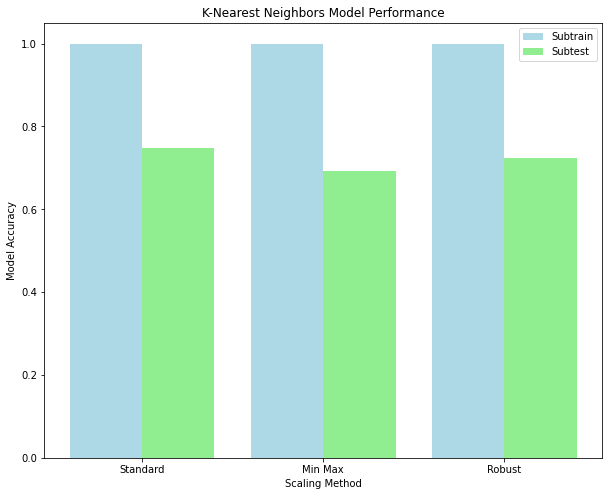

In [92]:
# extracting the K-Nearest Neighbors parameters dictionary
listvalues = []
for subset in range(len(listparamsubset)):
    values = []
    items = listparamsubset[subset].items()
    for item in items:
        values.append(item[1])
    listvalues.append(values)

# storing the K-Nearest Neighbors parameters
resultn = []
resultweight= []
resultmetric = []
for item in range(len(listvalues)):
    resultmetric.append(listvalues[item][0])
    resultn.append(listvalues[item][1])
    resultweight.append(listvalues[item][2])

# creating the list of scaled dataset name
listScalingMethod = ['Standard',
                    'Min Max',
                    'Robust']

# creating the K-Nearest Neighbors model performance
knnReport = pd.DataFrame({'Scaling Method': listScalingMethod,
                          'n_neighbors': resultn,
                          'Metric': resultmetric,
                          'Weight': resultweight,
                          'Subtrain Accuracy': listAccSubtrain,
                          'Subtest Accuracy': listAccSubtest})
display(knnReport)

# displaying the K-Nearest Neighborsn model performance
x = np.arange(len(listScalingMethod))
fig = plt.subplots(figsize = (10, 8))
# scaled subtrain bar plots
plt.bar(x - 0.2,
       knnReport['Subtrain Accuracy'],
       width = 0.4,
       label = 'Subtrain',
       color = 'lightblue')
# scaled subtest bar plots
plt.bar(x + 0.2,
       knnReport['Subtest Accuracy'],
       width = 0.4,
       label = 'Subtest',
       color = 'lightgreen')
# chart formatting
plt.title('K-Nearest Neighbors Model Performance')
plt.xlabel('Scaling Method')
plt.ylabel('Model Accuracy')
plt.xticks(x, listScalingMethod)
plt.legend()
plt.show()

Even after the scaling process, the K-Nearest Neighbors models are still overfitted. It is maybe due to the relatively large shape of the dataset. For now, we will be sticking to the previous Random Forest model whose overfitting has been handled.

## **V. Predicting the Test Dataset**

We are now going to predict the Credit_Score of the Test dataset using the model that has been developed. Let's review the model that we are going to use.

In [93]:
# Setting up the model using the previous setup
RFClassifier = RandomForestClassifier(criterion = 'gini',
                                      max_depth = 50,
                                      max_features = 'log2',
                                      min_samples_leaf = 30,
                                      n_estimators = 64)

With the above Random Forest model, the expected accuracy of the model is around 69-71%. Before feeding the test data into the model, we first need to encode the categorical features, so that the data can be processed by the model.

In [215]:
# checkpoint
test = pd.read_csv('Credit Score Classification (Cleaned Test Dataset).csv')

In [216]:
# encoding, storing the mappings, and transforming the categorical features in test dataset
EncodeDict = {}
for feature in testCat:
    enc.fit(test[feature])
    classes = list(enc.classes_)
    codes = list(enc.transform(list(enc.classes_)))
    EncodeDict[feature] = pd.DataFrame(list(zip(classes, codes)))
    EncodeDict[feature].columns = ('Classes', 'Codes')
    test[feature] = enc.transform(test[feature])

Let's feed the test dataset into the model, so that the Credit_Score can then be predicted and the result exported.

In [201]:
# fitting the subtrain data into the model
RFClassifier.fit(X_subtrain[fsubsetComplete], y_subtrain)

# predicting the Credit_Score for the test dataset
RFpred = RFClassifier.predict(test[fsubsetComplete])

In [243]:
# combining the RFpred into the test dataset
test['Credit_Score'] = RFpred

The Credit_Score feature in the test dataset has been successfully predicted. However, this Credit_Score and all of the categorical features are still in their encoded form and need to be transformed back to their original form.

In [217]:
# storing each feature encode mapping in dictionaries
DictMonth = dict(list(enumerate(EncodeDict['Month']['Classes'])))
DictOccupation = dict(list(enumerate(EncodeDict['Occupation']['Classes'])))
DictCredit_Mix = dict(list(enumerate(EncodeDict['Credit_Mix']['Classes'])))
DictPayment_of_Min_Amount = dict(list(enumerate(EncodeDict['Payment_of_Min_Amount']['Classes'])))
DictPayment_Behaviour = dict(list(enumerate(EncodeDict['Payment_Behaviour']['Classes'])))

In [244]:
# storing all the dictionaries in a list
dictionaries = [DictMonth, 
                DictOccupation,
                DictCredit_Mix,
                DictPayment_of_Min_Amount,
                DictPayment_Behaviour,
                DictCredit_Score]

In [245]:
# inverse-transforming the categorical features in test dataset
for feature, dictionary in zip(trainCat, dictionaries):
    test.replace({feature: dictionary}, inplace = True)

In [247]:
# taking a glance at how the test dataset looks like now
test

,Unnamed: 0,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Num_of_Loan,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,Credit_Score
0,0,0x160a,CUS_0xd40,September,24.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,3,7.0,11.27,4.0,Good,809.98,35.030402,273.0,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702,4,True,True,False,True,False,False,False,True,False,Good
1,1,0x160b,CUS_0xd40,October,24.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,3,9.0,13.27,4.0,Good,809.98,33.053114,274.0,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004,4,True,True,False,True,False,False,False,True,False,Good
2,2,0x160c,CUS_0xd40,November,24.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,-1,4.0,12.27,4.0,Good,809.98,33.811894,275.0,No,49.574949,148.233938,Low_spent_Medium_value_payments,264.675446,4,True,True,False,True,False,False,False,True,False,Good
3,3,0x160d,CUS_0xd40,December,24.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,5.0,11.27,4.0,Good,809.98,32.430559,276.0,No,49.574949,39.082511,High_spent_Medium_value_payments,343.826873,4,True,True,False,True,False,False,False,True,False,Good
4,4,0x1616,CUS_0x21b1,September,28.0,004-07-5839,Teacher,34847.84,3037.986667,2.0,4.0,6.0,3,1.0,5.42,5.0,Good,605.03,25.926822,327.0,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434,1,False,True,False,False,False,False,False,False,False,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,0x25fe5,CUS_0x8600,December,29.0,031-35-0942,Architect,20002.88,1929.906667,10.0,8.0,29.0,33,25.0,18.31,12.0,Standard,3571.70,34.780553,79.0,Yes,60.964772,146.486325,Low_spent_Small_value_payments,275.539570,5,True,False,False,False,True,False,False,True,True,Poor
49996,49996,0x25fee,CUS_0x942c,September,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,20,25.0,11.50,7.0,Good,502.38,27.758522,383.0,NM,35.104023,181.442999,Low_spent_Small_value_payments,409.394562,2,True,False,False,False,False,False,False,False,True,Standard
49997,49997,0x25fef,CUS_0x942c,October,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,23,5.0,13.50,7.0,Good,502.38,36.858542,384.0,No,35.104023,95.000000,Low_spent_Large_value_payments,349.726332,2,True,False,False,False,False,False,False,False,True,Standard
49998,49998,0x25ff0,CUS_0x942c,November,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,21,6.0,11.50,7.0,Good,502.38,39.139840,385.0,No,35.104023,97.598580,High_spent_Small_value_payments,463.238981,2,True,False,False,False,False,False,False,False,True,Standard


The test dataset looks good with the Credit_Score now has been predicted. The last step to do is just to export this result into a csv file.

In [248]:
# exporting the prediction result
test.to_csv('Credit Score Classification (Random Forest Prediction Result).csv')